In [1]:
import torch
import torch.fx as fx
import numpy as np
from torch.fx import symbolic_trace
from torch import nn
import torchvision
from torchvision import models
from torchvision import transforms
from PIL import Image
from scipy.stats import ttest_ind
import torch.optim as optim
import math
import torchvision
import pandas as pd
from numpy import array
from numpy.linalg import norm
from torch.optim import lr_scheduler
import seaborn as sns
from matplotlib import pyplot as plt
import h5py
from sklearn.metrics import accuracy_score

In [2]:
def get_few_shot_learing_data(_class, shot_number, trainloader):
    dataiter = iter(trainloader)
    _data = [ [] for i in range(len(_class))]
    _data_label = [ [] for i in range(len(_class))]

    while True:
        image, label = dataiter.next()

        if label in _class:
            if len(_data[label])!=shot_number:
                _data[label].append(image)
                _data_label[label].append(label)

        if sum([len(tab) for tab in _data]) ==   shot_number * len(_class):
             break

    out_data= []
    out_label= [] 

    out_data_tensor = torch.Tensor(len(_class)*shot_number,3, 224, 224)
    out_label_tensor= torch.Tensor(len(_class)*shot_number)

    for i in range(len(_class)):
        for j in range(shot_number):
            out_data.append(torch.tensor(_data[i][j]).clone().detach().unsqueeze(0))        
            out_label.append(torch.tensor(_data_label[i][j]).clone().detach()) 

    torch.cat(out_data , out=out_data_tensor)    
    torch.cat(out_label , out=out_label_tensor)    
    out_data_tensor=out_data_tensor.squeeze()
    out_label_tensor = out_label_tensor.type(torch.long)
    trainset_few_shot = out_data_tensor.squeeze(),out_label_tensor.squeeze()
    return trainset_few_shot



In [3]:
# import ssl

# ssl._create_default_https_context = ssl._create_unverified_context # remove for non-buggy env

np.random.seed = 123
torch.manual_seed(0)

transform = transforms.Compose([                       #[1]
             transforms.Resize(224),                    #[2]
             transforms.ToTensor()])


trainset = torchvision.datasets.CIFAR100(root='./data',
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=False, num_workers=2)


_class = [i for i in range(30)]
shot_number = 3

trainset_few_shot = get_few_shot_learing_data(_class,shot_number,trainloader)


Files already downloaded and verified


C:\Users\barto\AppData\Local\Temp/ipykernel_13580/3293775616.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_data.append(torch.tensor(_data[i][j]).clone().detach().unsqueeze(0))
C:\Users\barto\AppData\Local\Temp/ipykernel_13580/3293775616.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_label.append(torch.tensor(_data_label[i][j]).clone().detach())


In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # remove for non-buggy env

In [5]:
len(trainset_few_shot[0])

90

In [6]:
torch.cuda.is_available()

False

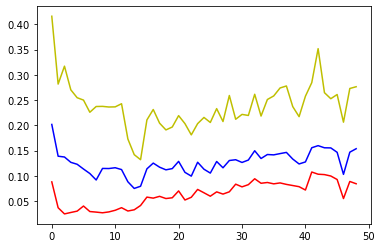

wybrane warstwy:  [41, 42, 43]


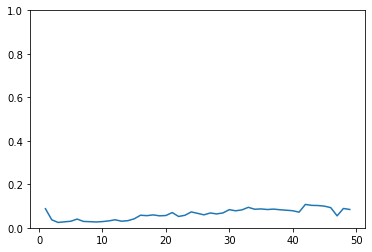

[41, 42, 43]
[[], [1872, 1803, 60, 1163, 1824, 363, 287, 792, 840, 1730, 96, 1262, 959, 1005, 1831, 1505, 348, 882, 1185, 813, 53, 1537, 1378, 130, 602, 1706, 1583, 1891, 543, 1379, 660, 2039, 196, 548, 601, 158, 1919, 464, 154, 1738, 1734, 1972, 427, 81, 1139, 1133, 1744, 1775, 569, 1966, 61, 1885, 1274, 2032, 1651, 735, 1964, 11, 1056, 652, 330, 600, 273, 205, 302, 695, 1932, 461, 1796, 1335, 806, 50, 1748, 1544, 1916, 572, 166, 32, 1220, 258, 940, 1555, 29, 404, 1328, 1110, 787, 208, 311, 1612, 895, 1025, 344, 997, 521, 1364, 296, 469, 1524, 1267, 1421, 483, 1127, 95, 1370, 1118, 1911, 971, 1608, 692, 1673, 2019, 1834, 823, 152, 1535, 1991, 377, 1113, 410, 1088, 936, 1150, 1107, 286, 1530, 762, 963, 970, 92, 1625, 747, 1645, 238, 939, 405, 821, 1770], [401, 114, 159, 311, 250, 23, 61, 72, 452, 356, 143, 254, 226, 399, 213, 238, 158, 146, 55, 26, 88, 499, 117, 389, 310, 242, 353, 361, 81, 69]]
8232
wybrane mapy:  [[], [1872, 1803, 60, 1163, 1824, 363, 287, 792, 840, 1730, 96, 1262, 9

ATL(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Module(
      (0): Module(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (downsample): Module(
          (0): Conv2d(64, 2

In [7]:

class ATL(nn.Module):
    def __init__(self, train, Nlayer=3):
        # call constructor from superclass
        Nclasses = len(np.unique(train[1]))
        super().__init__()
        self.resnet = models.resnet50(pretrained=True)
        self.relu = nn.ReLU()
        layers, R_scores_for_layers = self.get_layers(train, Nlayer)
        k = sns.lineplot(x=[i+1 for i in range(len(R_scores_for_layers))], y=R_scores_for_layers)
        k.set(ylim=(0, 1))
        plt.show()
        fm_indicies, resnet_out_size = self.get_featuremaps_idicies(train,layers, R_scores_for_layers) 
        self.resnet = self._transform( Nlayer, layers, fm_indicies)
        for param in self.resnet.parameters():
            param.requires_grad = False
        self.fcl = nn.Linear(resnet_out_size, Nclasses)
        self.softmax = torch.nn.Softmax(-1)
            
    def get_layers(self, train, number_of_layers):
        images, labels = train
        conv_layers, model_weights = self.get_resnet_conv_layers()
        feature_map_outputs_for_images = [self.get_feature_map_outputs(image) for image in images]
        labels_set = set(np.asarray(labels))
        
        R_scores_for_layers = []
        r_mean=[]
        r_max=[]
        for conv_ind in range(len(conv_layers)):
            
            centroids_for_class =[]
            LAV_vec = []             
                                
            for image_ind, image in enumerate(images):
                LAV_vec_image = []
                out_fm = feature_map_outputs_for_images[image_ind]
                for fm_ind in range(len(model_weights[conv_ind])):
                    LAV_vec_image.append(self.LAV(out_fm[conv_ind][fm_ind])) ##lav_vec jest vectorem przyjmującym lav dla każdego obrazka
                LAV_vec.append(LAV_vec_image)
            
              
                #iterujemy po klasach w danych
            for class_id, _class in enumerate(labels_set):
                    LAV_vec_curent_class = []
                    for i,fm in enumerate(LAV_vec):
                        if labels[i]==_class:
                            LAV_vec_curent_class.append(fm)
                    
                    n = len(LAV_vec_curent_class)
                    suma = np.asarray([0.0]*len(LAV_vec_curent_class[0]))
                    for k in range(n):
                        norm_l2 = norm(LAV_vec_curent_class[k])
                        nmn = np.asarray(LAV_vec_curent_class[k])/norm_l2
                        suma += nmn
                    centroid = 1/n * suma
                    centroids_for_class.append(centroid)
            
            #R-score
            r_val = []
            for a in range(len(centroids_for_class)-1):
                for b in range(a+1, len(centroids_for_class)):
                    rrrr = np.linalg.norm(centroids_for_class[a]-centroids_for_class[b])
                    r_val.append(rrrr)
            R = min(r_val)
            R2 = np.mean(r_val)
            R3 = max(r_val)
            R_scores_for_layers.append(R)
            r_mean.append(R2)
            r_max.append(R3)
        # choosing the best n layers
        lst = pd.Series(R_scores_for_layers)
        i = lst.nlargest(number_of_layers)
        
        
        
        x = [i for i in range(len(R_scores_for_layers))]
        plt.plot(x,R_scores_for_layers, 'r')
        plt.plot(x,r_mean, 'b')
        plt.plot(x,r_max, 'y')
        plt.show()
        print("wybrane warstwy: ",i.index.values.tolist())
        return sorted(i.index.values.tolist()), R_scores_for_layers 
        
    def get_featuremaps_idicies(self, train, layers,R,Pmax = 0.05):
        Rmax = max(R)
        dim0=[112]
        dim1=[56]*10
        dim2=[28]*12
        dim3=[14]*18
        dim4=[7]*8
        fm_dim = np.concatenate((dim0,dim1,dim2,dim3,dim4))        
        images, labels = train
        #print(labels)
        labels_set = set(np.asarray(labels))                
        conv_layers,model_weights = self.get_resnet_conv_layers()    
        choose_fm = []
        choose_fm_output_len=0        
        feature_map_outputs_for_images = [self.get_feature_map_outputs(image) for image in images]
                
        # iteruje po warstwach konwolucyjnuch 
        print(layers)
        for conv_ind in layers:
            choose_fm_curent_conv_layer = []            
            p_score_for_classs_and_maps  = [{} for i in range(len(labels_set))]
            
            # iteruje po mapach             
            for fm_ind in range(len(model_weights[conv_ind])):                
                LAV_vec = []
                    
                for image_ind,image in enumerate(images):
                    out_fm = feature_map_outputs_for_images[image_ind]
                    LAV_vec.append(self.LAV(out_fm[conv_ind][fm_ind]))
                 
                #iterujemy po klasach w danych
                for class_id, _class in enumerate(labels_set):
                    LAV_vec_curent_class = []
                    LAV_vec_other_class = []
                    for i,fm in enumerate(LAV_vec):
                        if labels[i]==_class:
                            LAV_vec_curent_class.append(fm)
                        else:     
                            LAV_vec_other_class.append(fm)
                    
                    # zwraca nan przy LAV_vec_current_class długości 1 !!
                    # czyli wtedy gdy z jakiejś klasy była tylko jedna obserwacja
                    # przy treningu nie będzie takiej sytucji
                    t_stat, p = ttest_ind(LAV_vec_curent_class, LAV_vec_other_class, equal_var=False)
                    
                    p_treshold = Pmax * R[conv_ind]/Rmax
                    
                    if(math.isnan(p)): 
                        p=1
                    
                    if (p < p_treshold):
                        _dict = p_score_for_classs_and_maps[class_id]
                        _dict[p] = fm_ind
            
            
            # N_feature - minimum z liczby map wybranuch dla danej klasy
            number_of_map_for_classes = [len(d) for d in  p_score_for_classs_and_maps]    
            N_feature = min(number_of_map_for_classes)
            
            for class_id, p_scores_and_map_indexes in enumerate(p_score_for_classs_and_maps):                 
                #wybranie N_feature, "najlepszych" map dla każdej klasy"
                p_scores = list(p_scores_and_map_indexes.keys())                
                sort_p_scores =  np.sort(p_scores)
                low_p_scores = sort_p_scores[:N_feature]
                
                for p_score in low_p_scores:
                    fm_ind = p_scores_and_map_indexes.get(p_score)
                    if fm_ind not in choose_fm_curent_conv_layer:
                        choose_fm_curent_conv_layer.append(fm_ind)
                        choose_fm_output_len += fm_dim[conv_ind]**2
                                        
            choose_fm.append(choose_fm_curent_conv_layer)
        
        print (choose_fm)
        print (choose_fm_output_len)
        
        # Musi zwracać obiekt który ma N iterowalnych rzeczy, z których każda ma ileś indeksów feature map. 
        # W sumie ilość indeksów musi być równa ilości klas * Nfeature z 2.3 w artykule
        #return [[1],[1]], 1568
        print("wybrane mapy: ", choose_fm)
        return choose_fm, choose_fm_output_len 
    
    
    def LAV(self,featureMap):
        return featureMap.max().detach().numpy().item(0)
    
    def _transform(self, n, layers, idx):
        gm = torch.fx.symbolic_trace(self.resnet)
        graph=gm.graph
        blocks_in_layers = [1,3,4,6,3]
        idx_to_layer_name = ['conv1'] +[f"layer{i}_{j}_conv{k}" for i in range(1,5) for j in range(blocks_in_layers[i]) for k in range(1,4)]
        layer_names = [idx_to_layer_name[idx] for idx in layers]
        final_nodes=[]
        last_node=None

        for node in graph.nodes:
            if node.name in layer_names:
                final_nodes.append(node)
            if not last_node and len(final_nodes)==n:
                last_node = node
            if node.name == 'output':
                out_node = node

        i=0
        nodes_to_output=[]
        for i in range(n):
            with graph.inserting_after(last_node):
            # Insert a new `call_function` node calling `torch.relu`
                new_node = graph.call_function(torch.tensor,
                                               args=(idx[i],),
                                              kwargs={"dtype":torch.int32})
                last_node = new_node

            with graph.inserting_after(last_node):
                new_node = graph.call_function(torch.index_select,
                                              args=(final_nodes[i], 1, last_node))
                last_node = new_node

            with graph.inserting_after(last_node):
                new_node = graph.call_function(torch.flatten,
                                              args=(last_node,1))
                nodes_to_output.append(new_node)
                last_node = new_node
        with graph.inserting_after(last_node):
                new_node = graph.call_function(torch.cat,
                                              args=(nodes_to_output,1))
        out_node.args=(new_node,)
        graph.eliminate_dead_code()
        graph.lint() 
        gm.recompile()
        print("chuj\n\n\n\n"+ gm.code+" \n\n\n\chuj")
        return gm
        
    
    def forward(self, x):
        x = self.resnet(x)
        x = self.relu(x)
        x = self.fcl(x)
        x = self.softmax(x)
        return x
    
    
    def get_resnet_conv_layers(self):
        model = self.resnet
        # we will save the conv layer weights in this list
        model_weights =[]

        #we will save the 49 conv layers in this list
        conv_layers = []

        # get all the model children as list
        model_children = list(model.children())

        #counter to keep count of the conv layers
        counter = 0
        #append all the conv layers and their respective wights to the list

        for i in range(len(model_children)):

            if type(model_children[i]) == nn.Conv2d:
                counter+=1
                model_weights.append(model_children[i].weight)
                conv_layers.append(model_children[i])

            elif type(model_children[i]) == nn.Sequential:
                for j in range(len(model_children[i])):
                    for child in model_children[i][j].children():
                        if type(child) == nn.Conv2d:
                            counter+=1
                            model_weights.append(child.weight)
                            conv_layers.append(child)

        #print(f"Total convolution layers: {counter}")
        #print("conv_layers")
        return (conv_layers,model_weights)
    
    def get_feature_map_outputs(self,image):
        conv_layers, _ = self.get_resnet_conv_layers()
        outputs = []
        names = []

        for layer in conv_layers[0:]:
            image = layer(image) #self.relu(layer(image))
            outputs.append(image)
            names.append(str(layer))
            
        #print(len(outputs))

        # print feature_maps
        #for feature_map in outputs:
            #print(feature_map.shape)
            
        return outputs;   



# CIFAR100 

# transform = transforms.Compose([                        #[1]
#              transforms.Resize(256),                    #[2]
#              transforms.CenterCrop(224),                #[3]
#              transforms.ToTensor(),                     #[4]
#              transforms.Normalize(                      #[5]
#              mean=[0.485, 0.456, 0.406],                #[6]
#              std=[0.229, 0.224, 0.225]                  #[7]
#              )])


# trainset = torchvision.datasets.CIFAR100(root='./data', train=True,
#                                         download=True, transform=transform)

# trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR100(root='./data', train=False,
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                          shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



# torch.manual_seed(0)
# # get some random training images
# dataiter = iter(trainloader)
# images, labels = dataiter.next()
# trainset = images, labels
# #print(trainset)

# print(images)
# print(labels)



m = ATL(trainset_few_shot, 3)
#m.eval()

m

In [8]:
len([23, 35, 34, 56, 47, 41, 13, 51, 32, 12, 37, 4, 39, 1, 47, 60, 22, 38, 49, 30, 50, 10, 19, 33, 22, 40, 20, 35, 2, 0, 14, 27, 43, 11, 17, 63, 36, 54, 55, 32, 46, 15, 48, 24, 3, 22, 51, 42, 28, 8, 60, 37, 4, 17, 19, 14, 10, 43, 28, 40, 32, 57, 1, 4, 15, 38, 22, 37, 28, 8, 60, 5, 11, 42, 40, 59, 38, 27, 41, 10, 44, 29, 62, 52, 56, 16, 58, 34, 57, 23, 9, 35, 48, 1, 36, 13, 34, 24, 27, 9, 24, 39, 51, 36, 38, 37, 21, 18, 9, 33, 3, 39, 45, 22, 18, 20, 54, 11, 40, 42, 45, 2, 57, 59, 38, 19, 23, 56, 45, 24, 29, 21, 35, 31, 18, 168, 219, 248, 171, 89, 246, 52, 50, 154, 6, 54, 17, 251, 9, 235, 192, 46, 228, 230, 44, 10, 200, 162, 166, 76, 87, 159, 195, 106, 58, 90, 18, 141, 236, 208, 13, 150, 168, 80, 253, 99, 196, 108, 116, 36, 133, 90, 145, 175, 227, 202, 16, 20, 245, 2, 53, 25, 97, 53, 89, 177, 186, 207, 79, 85, 36, 249, 185, 33, 136, 169, 186, 11, 107, 218, 182, 213, 167, 170, 89, 165, 138, 154, 120, 141, 103, 166, 61, 105, 15, 209, 225, 1, 57, 252, 128, 129, 6, 233, 254, 11, 15, 216, 23, 122, 307, 163, 195, 199, 84, 123, 82, 433, 340, 431, 57, 288, 56, 487, 17, 142, 510, 429, 281, 121, 181, 76, 47, 197, 234, 161, 348, 187, 16, 301, 404, 178, 499, 73, 189, 350, 384, 300, 244, 312, 29, 504, 38, 235, 53, 442, 291, 179, 183, 386, 192, 255, 395, 482, 269, 23, 392, 132, 376, 400, 214, 257, 473, 220, 25, 408, 405, 286, 251, 21, 273, 207, 213, 422, 45, 330, 82, 70, 382, 357, 98, 368, 253, 267, 218, 480, 509, 91, 181, 394, 351, 462, 286, 371, 421, 16, 382, 74, 180, 414, 229, 404, 2, 78, 452, 396, 223, 61, 434, 429, 245, 422, 179, 493, 116, 36, 469, 391, 387, 280, 281, 122, 127, 42, 332, 92, 114, 287, 255, 296, 339, 487, 386, 358, 192, 195, 103, 313, 265, 447, 250, 113, 165, 428, 233, 390, 422, 421, 481, 359, 78, 452, 204, 280, 32, 49, 320, 456, 178, 461, 299, 463, 180, 422, 327, 501, 508, 271, 374, 240, 122, 506, 98, 504, 21, 301, 202, 471, 49, 321, 94, 360, 143, 150, 272, 185, 191, 104, 144, 385, 310, 11, 30, 373, 389, 68, 192, 232, 376, 29, 474, 195, 361, 115, 384, 406, 196, 380, 363, 426, 384, 510, 215, 2, 179, 383, 448, 459, 90, 417, 33, 486, 366, 44, 452, 496, 127, 150, 291, 273, 167, 357, 179, 281, 142, 406, 404, 41, 131, 241, 349, 59, 170, 437, 187, 332, 97, 468, 482, 259, 256, 93, 421, 351, 116, 267, 218, 419, 371, 181, 86, 247, 325, 214, 414, 91, 359, 148, 143, 394, 180, 289, 189, 84, 188, 289, 379, 433, 129, 37, 115, 258, 56, 105, 317, 253, 120, 354, 96, 219, 155, 507, 426, 278, 230, 286, 262, 359, 445, 66, 266, 92, 254, 39, 202, 291, 394, 225, 180, 153, 204, 441, 121, 453, 78])

555

In [9]:

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(m.parameters(), lr=0.001, momentum=0.9)
optimizer = torch.optim.Adam(m.parameters(),lr=0.01)
scheduler = lr_scheduler.MultiplicativeLR(optimizer, lr_lambda=0.8)

tensor([[0.0316, 0.0335, 0.0334,  ..., 0.0332, 0.0310, 0.0325],
        [0.0333, 0.0324, 0.0322,  ..., 0.0317, 0.0331, 0.0344],
        [0.0323, 0.0336, 0.0333,  ..., 0.0321, 0.0335, 0.0325],
        ...,
        [0.0339, 0.0330, 0.0332,  ..., 0.0312, 0.0339, 0.0330],
        [0.0330, 0.0341, 0.0337,  ..., 0.0317, 0.0330, 0.0345],
        [0.0326, 0.0346, 0.0341,  ..., 0.0343, 0.0330, 0.0326]],
       grad_fn=<SoftmaxBackward0>)


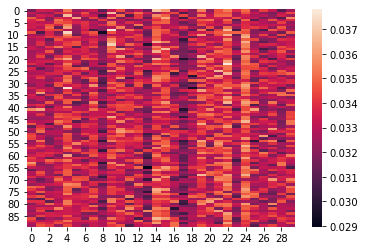

[1] loss: 0.136
tensor([[0.1063, 0.0240, 0.0369,  ..., 0.0299, 0.0351, 0.0298],
        [0.1276, 0.0293, 0.0354,  ..., 0.0299, 0.0267, 0.0264],
        [0.1311, 0.0245, 0.0380,  ..., 0.0284, 0.0338, 0.0276],
        ...,
        [0.0390, 0.0295, 0.0345,  ..., 0.0258, 0.0362, 0.0853],
        [0.0285, 0.0333, 0.0325,  ..., 0.0294, 0.0292, 0.0865],
        [0.0356, 0.0280, 0.0348,  ..., 0.0295, 0.0326, 0.0867]],
       grad_fn=<SoftmaxBackward0>)


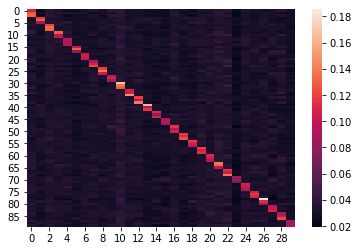

[2] loss: 0.133
tensor([[0.2843, 0.0151, 0.0353,  ..., 0.0234, 0.0304, 0.0225],
        [0.3623, 0.0212, 0.0306,  ..., 0.0219, 0.0167, 0.0152],
        [0.3834, 0.0139, 0.0337,  ..., 0.0193, 0.0237, 0.0177],
        ...,
        [0.0439, 0.0247, 0.0333,  ..., 0.0201, 0.0323, 0.1828],
        [0.0248, 0.0306, 0.0300,  ..., 0.0258, 0.0234, 0.1835],
        [0.0375, 0.0213, 0.0333,  ..., 0.0242, 0.0278, 0.1890]],
       grad_fn=<SoftmaxBackward0>)


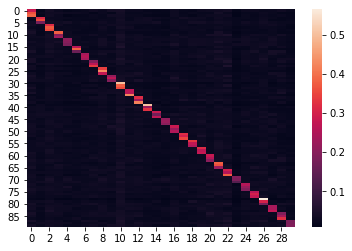

[3] loss: 0.126
tensor([[0.5610, 0.0075, 0.0245,  ..., 0.0139, 0.0196, 0.0128],
        [0.6821, 0.0106, 0.0177,  ..., 0.0109, 0.0070, 0.0059],
        [0.7151, 0.0052, 0.0183,  ..., 0.0085, 0.0104, 0.0071],
        ...,
        [0.0444, 0.0188, 0.0282,  ..., 0.0141, 0.0252, 0.3387],
        [0.0198, 0.0259, 0.0247,  ..., 0.0205, 0.0167, 0.3371],
        [0.0349, 0.0147, 0.0276,  ..., 0.0177, 0.0207, 0.3577]],
       grad_fn=<SoftmaxBackward0>)


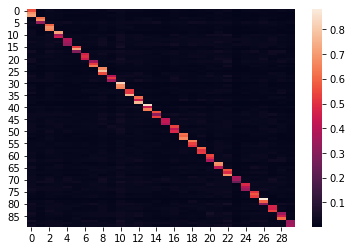

[4] loss: 0.117
tensor([[0.7929, 0.0029, 0.0113,  ..., 0.0069, 0.0103, 0.0066],
        [0.8821, 0.0041, 0.0068,  ..., 0.0044, 0.0023, 0.0021],
        [0.9019, 0.0015, 0.0065,  ..., 0.0031, 0.0037, 0.0025],
        ...,
        [0.0314, 0.0117, 0.0166,  ..., 0.0083, 0.0168, 0.5801],
        [0.0112, 0.0178, 0.0148,  ..., 0.0139, 0.0099, 0.5723],
        [0.0227, 0.0080, 0.0160,  ..., 0.0106, 0.0126, 0.6105]],
       grad_fn=<SoftmaxBackward0>)


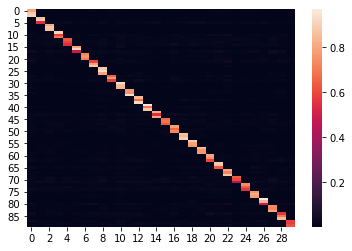

[5] loss: 0.108
tensor([[9.0665e-01, 1.0705e-03, 4.2650e-03,  ..., 3.2984e-03, 5.4676e-03,
         3.8778e-03],
        [9.5379e-01, 1.6663e-03, 2.4003e-03,  ..., 1.9010e-03, 8.4517e-04,
         9.9017e-04],
        [9.6319e-01, 4.8865e-04, 2.1661e-03,  ..., 1.1906e-03, 1.5240e-03,
         1.1847e-03],
        ...,
        [1.2885e-02, 5.0941e-03, 5.8776e-03,  ..., 3.4239e-03, 8.1759e-03,
         8.1992e-01],
        [3.8740e-03, 8.5697e-03, 5.6542e-03,  ..., 6.6378e-03, 4.3653e-03,
         8.0562e-01],
        [8.7275e-03, 2.9957e-03, 5.6128e-03,  ..., 4.3919e-03, 5.5516e-03,
         8.4065e-01]], grad_fn=<SoftmaxBackward0>)


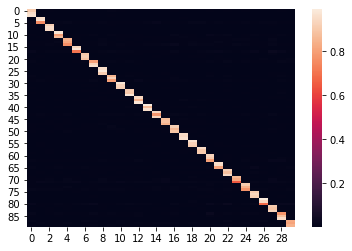

[6] loss: 0.102
tensor([[9.5651e-01, 4.0414e-04, 1.5707e-03,  ..., 1.4644e-03, 2.9709e-03,
         2.4689e-03],
        [9.7963e-01, 7.5780e-04, 9.1005e-04,  ..., 8.3662e-04, 3.5305e-04,
         5.4972e-04],
        [9.8415e-01, 1.7730e-04, 7.7935e-04,  ..., 4.7950e-04, 7.1803e-04,
         6.5669e-04],
        ...,
        [3.8356e-03, 1.7277e-03, 1.5706e-03,  ..., 1.0289e-03, 3.0834e-03,
         9.4041e-01],
        [1.0163e-03, 3.2081e-03, 1.6443e-03,  ..., 2.2994e-03, 1.5032e-03,
         9.3051e-01],
        [2.5238e-03, 8.9401e-04, 1.5252e-03,  ..., 1.3523e-03, 1.9426e-03,
         9.4839e-01]], grad_fn=<SoftmaxBackward0>)


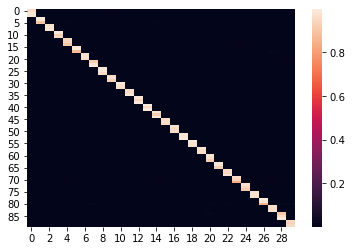

[7] loss: 0.100
tensor([[9.7899e-01, 1.5918e-04, 6.0628e-04,  ..., 6.3678e-04, 1.6039e-03,
         1.5231e-03],
        [9.9015e-01, 3.7143e-04, 3.7867e-04,  ..., 3.7803e-04, 1.5823e-04,
         3.1561e-04],
        [9.9245e-01, 7.1192e-05, 3.1121e-04,  ..., 2.0135e-04, 3.6074e-04,
         3.7559e-04],
        ...,
        [1.1567e-03, 5.9246e-04, 4.3395e-04,  ..., 3.0278e-04, 1.1399e-03,
         9.7999e-01],
        [2.6970e-04, 1.1804e-03, 4.8086e-04,  ..., 7.5534e-04, 5.0509e-04,
         9.7523e-01],
        [7.5551e-04, 2.7556e-04, 4.3374e-04,  ..., 4.1307e-04, 6.8183e-04,
         9.8277e-01]], grad_fn=<SoftmaxBackward0>)


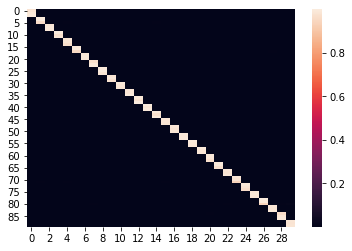

[8] loss: 0.099
tensor([[9.8939e-01, 6.6357e-05, 2.5125e-04,  ..., 2.8583e-04, 8.7417e-04,
         9.1385e-04],
        [9.9487e-01, 1.9348e-04, 1.7231e-04,  ..., 1.8012e-04, 7.5282e-05,
         1.8292e-04],
        [9.9612e-01, 3.1133e-05, 1.3704e-04,  ..., 9.0231e-05, 1.9036e-04,
         2.1661e-04],
        ...,
        [3.9640e-04, 2.2596e-04, 1.3778e-04,  ..., 9.9371e-05, 4.5782e-04,
         9.9247e-01],
        [8.1107e-05, 4.7201e-04, 1.5772e-04,  ..., 2.6934e-04, 1.8411e-04,
         9.9027e-01],
        [2.5841e-04, 9.5635e-05, 1.4162e-04,  ..., 1.4067e-04, 2.6270e-04,
         9.9353e-01]], grad_fn=<SoftmaxBackward0>)


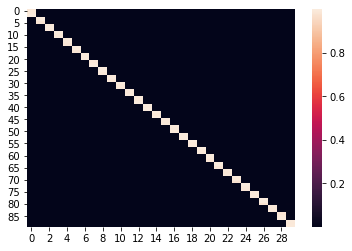

[9] loss: 0.099
tensor([[9.9436e-01, 2.9552e-05, 1.1243e-04,  ..., 1.3571e-04, 4.9043e-04,
         5.4907e-04],
        [9.9714e-01, 1.0662e-04, 8.4984e-05,  ..., 9.1404e-05, 3.8044e-05,
         1.0827e-04],
        [9.9786e-01, 1.4709e-05, 6.5790e-05,  ..., 4.3465e-05, 1.0557e-04,
         1.2756e-04],
        ...,
        [1.5484e-04, 9.6262e-05, 5.0251e-05,  ..., 3.6943e-05, 2.0251e-04,
         9.9681e-01],
        [2.7908e-05, 2.0793e-04, 5.8599e-05,  ..., 1.0692e-04, 7.4215e-05,
         9.9574e-01],
        [1.0082e-04, 3.7417e-05, 5.2923e-05,  ..., 5.4049e-05, 1.1209e-04,
         9.9727e-01]], grad_fn=<SoftmaxBackward0>)


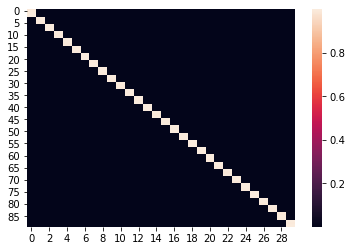

[10] loss: 0.098
tensor([[9.9684e-01, 1.4091e-05, 5.4194e-05,  ..., 6.8597e-05, 2.8610e-04,
         3.3688e-04],
        [9.9831e-01, 6.1960e-05, 4.5015e-05,  ..., 4.9384e-05, 2.0399e-05,
         6.6108e-05],
        [9.9875e-01, 7.4585e-06, 3.4067e-05,  ..., 2.2450e-05, 6.1531e-05,
         7.7513e-05],
        ...,
        [6.7667e-05, 4.5172e-05, 2.0638e-05,  ..., 1.5363e-05, 9.7837e-05,
         9.9850e-01],
        [1.0826e-05, 1.0007e-04, 2.4326e-05,  ..., 4.6934e-05, 3.2889e-05,
         9.9795e-01],
        [4.4002e-05, 1.6258e-05, 2.2194e-05,  ..., 2.3134e-05, 5.2452e-05,
         9.9873e-01]], grad_fn=<SoftmaxBackward0>)


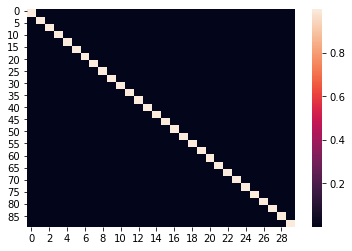

[11] loss: 0.098
tensor([[9.9813e-01, 7.1750e-06, 2.7987e-05,  ..., 3.6867e-05, 1.7410e-04,
         2.1302e-04],
        [9.9895e-01, 3.7825e-05, 2.5397e-05,  ..., 2.8283e-05, 1.1569e-05,
         4.1823e-05],
        [9.9923e-01, 4.0332e-06, 1.8851e-05,  ..., 1.2361e-05, 3.7611e-05,
         4.8824e-05],
        ...,
        [3.2494e-05, 2.3022e-05, 9.3661e-06,  ..., 7.0348e-06, 5.1057e-05,
         9.9923e-01],
        [4.6551e-06, 5.2037e-05, 1.1110e-05,  ..., 2.2505e-05, 1.5855e-05,
         9.9892e-01],
        [2.1098e-05, 7.7287e-06, 1.0257e-05,  ..., 1.0865e-05, 2.6597e-05,
         9.9935e-01]], grad_fn=<SoftmaxBackward0>)


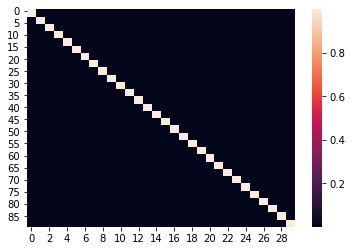

[12] loss: 0.098
tensor([[9.9884e-01, 3.8843e-06, 1.5386e-05,  ..., 2.0981e-05, 1.1044e-04,
         1.3929e-04],
        [9.9931e-01, 2.4158e-05, 1.5152e-05,  ..., 1.7078e-05, 6.9088e-06,
         2.7433e-05],
        [9.9950e-01, 2.3113e-06, 1.1059e-05,  ..., 7.2090e-06, 2.4032e-05,
         3.1901e-05],
        ...,
        [1.6898e-05, 1.2595e-05, 4.6270e-06,  ..., 3.4995e-06, 2.8493e-05,
         9.9958e-01],
        [2.1874e-06, 2.8943e-05, 5.5087e-06,  ..., 1.1651e-05, 8.2294e-06,
         9.9939e-01],
        [1.0953e-05, 3.9700e-06, 5.1479e-06,  ..., 5.5271e-06, 1.4462e-05,
         9.9964e-01]], grad_fn=<SoftmaxBackward0>)


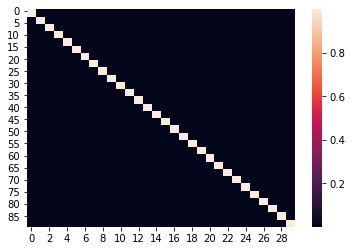

[13] loss: 0.098
tensor([[9.9925e-01, 2.2241e-06, 8.9490e-06,  ..., 1.2580e-05, 7.2878e-05,
         9.4186e-05],
        [9.9953e-01, 1.6077e-05, 9.5000e-06,  ..., 1.0816e-05, 4.3253e-06,
         1.8634e-05],
        [9.9966e-01, 1.3955e-06, 6.8319e-06,  ..., 4.4268e-06, 1.5992e-05,
         2.1594e-05],
        ...,
        [9.4096e-06, 7.3265e-06, 2.4589e-06,  ..., 1.8702e-06, 1.6860e-05,
         9.9975e-01],
        [1.1101e-06, 1.7073e-05, 2.9335e-06,  ..., 6.4489e-06, 4.5586e-06,
         9.9964e-01],
        [6.0888e-06, 2.1813e-06, 2.7742e-06,  ..., 3.0131e-06, 8.3592e-06,
         9.9979e-01]], grad_fn=<SoftmaxBackward0>)


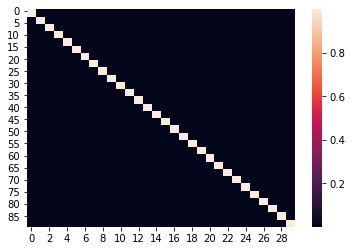

[14] loss: 0.098
tensor([[9.9949e-01, 1.3401e-06, 5.4757e-06,  ..., 7.9084e-06, 4.9881e-05,
         6.5775e-05],
        [9.9967e-01, 1.1104e-05, 6.2254e-06,  ..., 7.1492e-06, 2.8261e-06,
         1.3080e-05],
        [9.9976e-01, 8.8306e-07, 4.4190e-06,  ..., 2.8466e-06, 1.1042e-05,
         1.5111e-05],
        ...,
        [5.5598e-06, 4.4973e-06, 1.3924e-06,  ..., 1.0641e-06, 1.0505e-05,
         9.9984e-01],
        [6.0262e-07, 1.0607e-05, 1.6629e-06,  ..., 3.7850e-06, 2.6745e-06,
         9.9977e-01],
        [3.5915e-06, 1.2715e-06, 1.5906e-06,  ..., 1.7450e-06, 5.0983e-06,
         9.9987e-01]], grad_fn=<SoftmaxBackward0>)


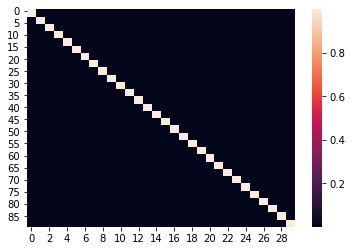

[15] loss: 0.098
tensor([[9.9965e-01, 8.4556e-07, 3.5065e-06,  ..., 5.1886e-06, 3.5305e-05,
         4.7345e-05],
        [9.9976e-01, 7.9322e-06, 4.2440e-06,  ..., 4.9106e-06, 1.9195e-06,
         9.4652e-06],
        [9.9983e-01, 5.8288e-07, 2.9779e-06,  ..., 1.9076e-06, 7.8846e-06,
         1.0905e-05],
        ...,
        [3.4604e-06, 2.8947e-06, 8.3376e-07,  ..., 6.3979e-07, 6.8502e-06,
         9.9990e-01],
        [3.4717e-07, 6.8983e-06, 9.9607e-07,  ..., 2.3396e-06, 1.6512e-06,
         9.9985e-01],
        [2.2316e-06, 7.8086e-07, 9.6300e-07,  ..., 1.0659e-06, 3.2611e-06,
         9.9992e-01]], grad_fn=<SoftmaxBackward0>)


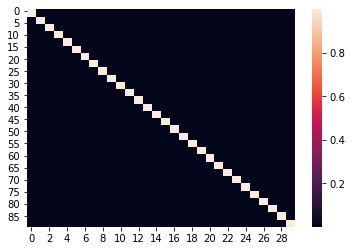

[16] loss: 0.098
tensor([[9.9974e-01, 5.5628e-07, 2.3395e-06,  ..., 3.5379e-06, 2.5765e-05,
         3.5048e-05],
        [9.9982e-01, 5.8412e-06, 2.9976e-06,  ..., 3.4916e-06, 1.3501e-06,
         7.0438e-06],
        [9.9987e-01, 3.9965e-07, 2.0818e-06,  ..., 1.3266e-06, 5.8035e-06,
         8.0959e-06],
        ...,
        [2.2550e-06, 1.9432e-06, 5.2450e-07,  ..., 4.0393e-07, 4.6521e-06,
         9.9993e-01],
        [2.1083e-07, 4.6733e-06, 6.2656e-07,  ..., 1.5142e-06, 1.0669e-06,
         9.9990e-01],
        [1.4519e-06, 5.0231e-07, 6.1185e-07,  ..., 6.8265e-07, 2.1762e-06,
         9.9994e-01]], grad_fn=<SoftmaxBackward0>)


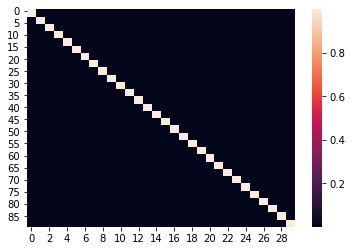

[17] loss: 0.098
tensor([[9.9981e-01, 3.8005e-07, 1.6196e-06,  ..., 2.4979e-06, 1.9335e-05,
         2.6623e-05],
        [9.9986e-01, 4.4215e-06, 2.1859e-06,  ..., 2.5611e-06, 9.8015e-07,
         5.3780e-06],
        [9.9990e-01, 2.8358e-07, 1.5041e-06,  ..., 9.5388e-07, 4.3909e-06,
         6.1680e-06],
        ...,
        [1.5307e-06, 1.3544e-06, 3.4478e-07,  ..., 2.6637e-07, 3.2761e-06,
         9.9995e-01],
        [1.3420e-07, 3.2835e-06, 4.1172e-07,  ..., 1.0210e-06, 7.1803e-07,
         9.9993e-01],
        [9.8406e-07, 3.3680e-07, 4.0580e-07,  ..., 4.5599e-07, 1.5082e-06,
         9.9996e-01]], grad_fn=<SoftmaxBackward0>)


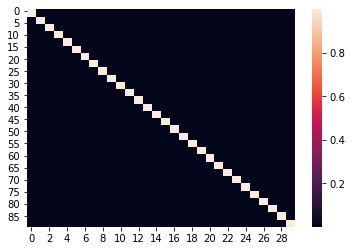

[18] loss: 0.098
tensor([[9.9985e-01, 2.6868e-07, 1.1592e-06,  ..., 1.8199e-06, 1.4883e-05,
         2.0708e-05],
        [9.9989e-01, 3.4312e-06, 1.6403e-06,  ..., 1.9322e-06, 7.3228e-07,
         4.2035e-06],
        [9.9992e-01, 2.0755e-07, 1.1194e-06,  ..., 7.0677e-07, 3.4059e-06,
         4.8117e-06],
        ...,
        [1.0776e-06, 9.7622e-07, 2.3573e-07,  ..., 1.8264e-07, 2.3833e-06,
         9.9996e-01],
        [8.9092e-08, 2.3837e-06, 2.8133e-07,  ..., 7.1423e-07, 5.0122e-07,
         9.9994e-01],
        [6.9179e-07, 2.3436e-07, 2.7968e-07,  ..., 3.1629e-07, 1.0814e-06,
         9.9997e-01]], grad_fn=<SoftmaxBackward0>)


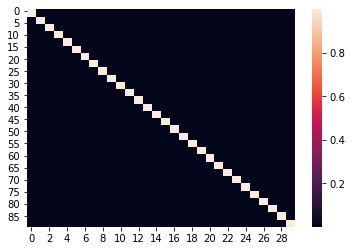

[19] loss: 0.098
tensor([[9.9989e-01, 1.9593e-07, 8.5508e-07,  ..., 1.3643e-06, 1.1723e-05,
         1.6460e-05],
        [9.9991e-01, 2.7236e-06, 1.2633e-06,  ..., 1.4951e-06, 5.6149e-07,
         3.3565e-06],
        [9.9994e-01, 1.5622e-07, 8.5574e-07,  ..., 5.3809e-07, 2.7022e-06,
         3.8357e-06],
        ...,
        [7.8384e-07, 7.2524e-07, 1.6695e-07,  ..., 1.2968e-07, 1.7853e-06,
         9.9997e-01],
        [6.1428e-08, 1.7822e-06, 1.9911e-07,  ..., 5.1639e-07, 3.6158e-07,
         9.9996e-01],
        [5.0253e-07, 1.6861e-07, 1.9952e-07,  ..., 2.2694e-07, 7.9941e-07,
         9.9998e-01]], grad_fn=<SoftmaxBackward0>)


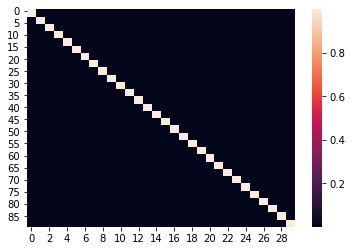

[20] loss: 0.098
tensor([[9.9991e-01, 1.4694e-07, 6.4820e-07,  ..., 1.0494e-06, 9.4298e-06,
         1.3344e-05],
        [9.9992e-01, 2.2067e-06, 9.9603e-07,  ..., 1.1839e-06, 4.4081e-07,
         2.7330e-06],
        [9.9995e-01, 1.2061e-07, 6.7021e-07,  ..., 4.1984e-07, 2.1884e-06,
         3.1184e-06],
        ...,
        [5.8717e-07, 5.5366e-07, 1.2206e-07,  ..., 9.5028e-08, 1.3731e-06,
         9.9998e-01],
        [4.3823e-08, 1.3683e-06, 1.4545e-07,  ..., 3.8463e-07, 2.6872e-07,
         9.9997e-01],
        [3.7597e-07, 1.2502e-07, 1.4683e-07,  ..., 1.6788e-07, 6.0748e-07,
         9.9998e-01]], grad_fn=<SoftmaxBackward0>)


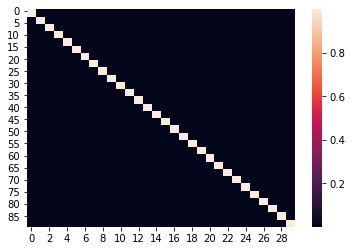

[21] loss: 0.098
tensor([[9.9993e-01, 1.1306e-07, 5.0369e-07,  ..., 8.2635e-07, 7.7317e-06,
         1.1016e-05],
        [9.9994e-01, 1.8214e-06, 8.0218e-07,  ..., 9.5715e-07, 3.5356e-07,
         2.2653e-06],
        [9.9996e-01, 9.5287e-08, 5.3653e-07,  ..., 3.3495e-07, 1.8057e-06,
         2.5812e-06],
        ...,
        [4.5166e-07, 4.3319e-07, 9.1826e-08,  ..., 7.1641e-08, 1.0816e-06,
         9.9998e-01],
        [3.2240e-08, 1.0760e-06, 1.0933e-07,  ..., 2.9428e-07, 2.0514e-07,
         9.9997e-01],
        [2.8886e-07, 9.5249e-08, 1.1112e-07,  ..., 1.2765e-07, 4.7327e-07,
         9.9999e-01]], grad_fn=<SoftmaxBackward0>)


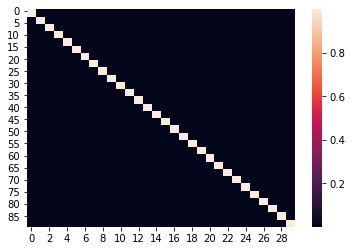

[22] loss: 0.098
tensor([[9.9994e-01, 8.9028e-08, 4.0028e-07,  ..., 6.6468e-07, 6.4506e-06,
         9.2458e-06],
        [9.9995e-01, 1.5291e-06, 6.5864e-07,  ..., 7.8863e-07, 2.8915e-07,
         1.9083e-06],
        [9.9996e-01, 7.6872e-08, 4.3815e-07,  ..., 2.7267e-07, 1.5153e-06,
         2.1719e-06],
        ...,
        [3.5585e-07, 3.4655e-07, 7.0895e-08,  ..., 5.5415e-08, 8.7051e-07,
         9.9999e-01],
        [2.4389e-08, 8.6469e-07, 8.4338e-08,  ..., 2.3069e-07, 1.6046e-07,
         9.9998e-01],
        [2.2733e-07, 7.4375e-08, 8.6249e-08,  ..., 9.9508e-08, 3.7712e-07,
         9.9999e-01]], grad_fn=<SoftmaxBackward0>)


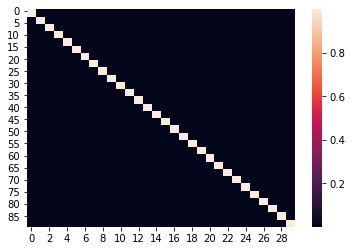

[23] loss: 0.098
tensor([[9.9995e-01, 7.1600e-08, 3.2467e-07,  ..., 5.4506e-07, 5.4678e-06,
         7.8780e-06],
        [9.9995e-01, 1.3036e-06, 5.5034e-07,  ..., 6.6105e-07, 2.4070e-07,
         1.6316e-06],
        [9.9997e-01, 6.3206e-08, 3.6432e-07,  ..., 2.2607e-07, 1.2914e-06,
         1.8550e-06],
        ...,
        [2.8650e-07, 2.8288e-07, 5.6033e-08,  ..., 4.3873e-08, 7.1447e-07,
         9.9999e-01],
        [1.8920e-08, 7.0871e-07, 6.6600e-08,  ..., 1.8487e-07, 1.2831e-07,
         9.9998e-01],
        [1.8285e-07, 5.9386e-08, 6.8500e-08,  ..., 7.9339e-08, 3.0671e-07,
         9.9999e-01]], grad_fn=<SoftmaxBackward0>)


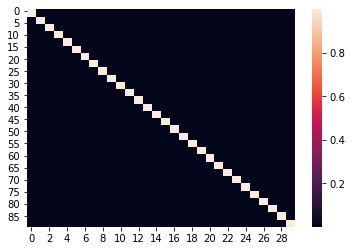

[24] loss: 0.098
tensor([[9.9995e-01, 5.8700e-08, 2.6827e-07,  ..., 4.5489e-07, 4.7022e-06,
         6.8056e-06],
        [9.9996e-01, 1.1271e-06, 4.6724e-07,  ..., 5.6284e-07, 2.0363e-07,
         1.4141e-06],
        [9.9997e-01, 5.2876e-08, 3.0795e-07,  ..., 1.9059e-07, 1.1162e-06,
         1.6061e-06],
        ...,
        [2.3525e-07, 2.3517e-07, 4.5239e-08,  ..., 3.5476e-08, 5.9691e-07,
         9.9999e-01],
        [1.5018e-08, 5.9133e-07, 5.3723e-08,  ..., 1.5114e-07, 1.0468e-07,
         9.9999e-01],
        [1.4999e-07, 4.8387e-08, 5.5547e-08,  ..., 6.4564e-08, 2.5412e-07,
         9.9999e-01]], grad_fn=<SoftmaxBackward0>)


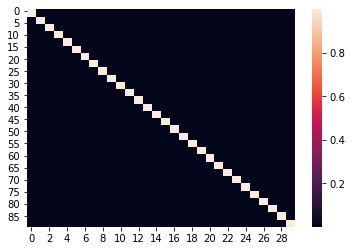

[25] loss: 0.098
tensor([[9.9996e-01, 4.8973e-08, 2.2544e-07,  ..., 3.8576e-07, 4.0974e-06,
         5.9538e-06],
        [9.9996e-01, 9.8697e-07, 4.0247e-07,  ..., 4.8608e-07, 1.7481e-07,
         1.2408e-06],
        [9.9998e-01, 4.4937e-08, 2.6421e-07,  ..., 1.6312e-07, 9.7713e-07,
         1.4080e-06],
        ...,
        [1.9664e-07, 1.9878e-07, 3.7235e-08,  ..., 2.9241e-08, 5.0679e-07,
         9.9999e-01],
        [1.2170e-08, 5.0146e-07, 4.4180e-08,  ..., 1.2582e-07, 8.6969e-08,
         9.9999e-01],
        [1.2526e-07, 4.0156e-08, 4.5902e-08,  ..., 5.3525e-08, 2.1412e-07,
         9.9999e-01]], grad_fn=<SoftmaxBackward0>)


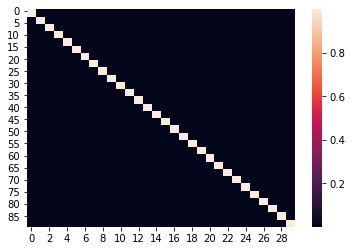

[26] loss: 0.098
tensor([[9.9997e-01, 4.1514e-08, 1.9238e-07,  ..., 3.3193e-07, 3.6135e-06,
         5.2688e-06],
        [9.9997e-01, 8.7438e-07, 3.5129e-07,  ..., 4.2526e-07, 1.5209e-07,
         1.1010e-06],
        [9.9998e-01, 3.8741e-08, 2.2978e-07,  ..., 1.4156e-07, 8.6544e-07,
         1.2485e-06],
        ...,
        [1.6704e-07, 1.7058e-07, 3.1189e-08,  ..., 2.4524e-08, 4.3663e-07,
         9.9999e-01],
        [1.0051e-08, 4.3157e-07, 3.6976e-08,  ..., 1.0648e-07, 7.3461e-08,
         9.9999e-01],
        [1.0633e-07, 3.3887e-08, 3.8588e-08,  ..., 4.5128e-08, 1.8321e-07,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


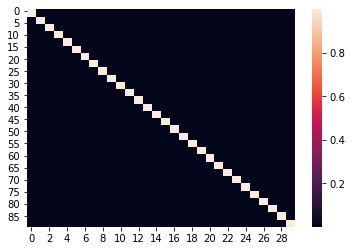

[27] loss: 0.098
tensor([[9.9997e-01, 3.5706e-08, 1.6649e-07,  ..., 2.8943e-07, 3.2219e-06,
         4.7120e-06],
        [9.9997e-01, 7.8290e-07, 3.1032e-07,  ..., 3.7647e-07, 1.3395e-07,
         9.8714e-07],
        [9.9998e-01, 3.3838e-08, 2.0233e-07,  ..., 1.2439e-07, 7.7471e-07,
         1.1186e-06],
        ...,
        [1.4401e-07, 1.4840e-07, 2.6545e-08,  ..., 2.0897e-08, 3.8123e-07,
         9.9999e-01],
        [8.4440e-09, 3.7644e-07, 3.1444e-08,  ..., 9.1472e-08, 6.2993e-08,
         9.9999e-01],
        [9.1594e-08, 2.9034e-08, 3.2950e-08,  ..., 3.8636e-08, 1.5896e-07,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


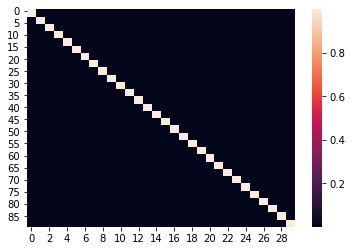

[28] loss: 0.098
tensor([[9.9997e-01, 3.1120e-08, 1.4594e-07,  ..., 2.5544e-07, 2.9016e-06,
         4.2546e-06],
        [9.9997e-01, 7.0780e-07, 2.7714e-07,  ..., 3.3688e-07, 1.1930e-07,
         8.9341e-07],
        [9.9998e-01, 2.9911e-08, 1.8017e-07,  ..., 1.1057e-07, 7.0025e-07,
         1.0118e-06],
        ...,
        [1.2582e-07, 1.3072e-07, 2.2922e-08,  ..., 1.8064e-08, 3.3693e-07,
         9.9999e-01],
        [7.2059e-09, 3.3239e-07, 2.7131e-08,  ..., 7.9659e-08, 5.4762e-08,
         9.9999e-01],
        [7.9970e-08, 2.5223e-08, 2.8537e-08,  ..., 3.3543e-08, 1.3968e-07,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


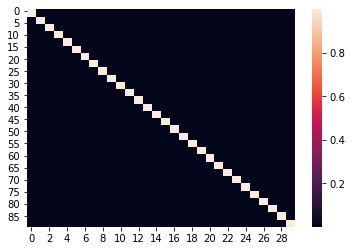

[29] loss: 0.098
tensor([[9.9998e-01, 2.7452e-08, 1.2941e-07,  ..., 2.2794e-07, 2.6371e-06,
         3.8755e-06],
        [9.9998e-01, 6.4558e-07, 2.5000e-07,  ..., 3.0442e-07, 1.0733e-07,
         8.1555e-07],
        [9.9998e-01, 2.6727e-08, 1.6210e-07,  ..., 9.9311e-08, 6.3857e-07,
         9.2313e-07],
        ...,
        [1.1128e-07, 1.1647e-07, 2.0056e-08,  ..., 1.5821e-08, 3.0108e-07,
         1.0000e+00],
        [6.2373e-09, 2.9677e-07, 2.3721e-08,  ..., 7.0238e-08, 4.8205e-08,
         9.9999e-01],
        [7.0680e-08, 2.2189e-08, 2.5037e-08,  ..., 2.9493e-08, 1.2416e-07,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


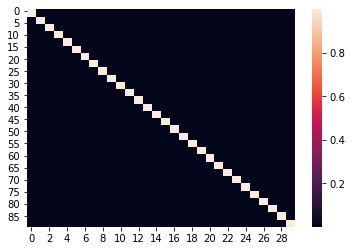

[30] loss: 0.098
tensor([[9.9998e-01, 2.4485e-08, 1.1599e-07,  ..., 2.0545e-07, 2.4168e-06,
         3.5587e-06],
        [9.9998e-01, 5.9359e-07, 2.2757e-07,  ..., 2.7756e-07, 9.7456e-08,
         7.5035e-07],
        [9.9999e-01, 2.4121e-08, 1.4721e-07,  ..., 9.0051e-08, 5.8704e-07,
         8.4893e-07],
        ...,
        [9.9511e-08, 1.0485e-07, 1.7761e-08,  ..., 1.4023e-08, 2.7177e-07,
         1.0000e+00],
        [5.4693e-09, 2.6767e-07, 2.0990e-08,  ..., 6.2635e-08, 4.2919e-08,
         9.9999e-01],
        [6.3168e-08, 1.9746e-08, 2.2226e-08,  ..., 2.6234e-08, 1.1154e-07,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


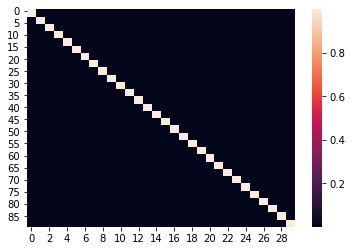

[31] loss: 0.098
tensor([[9.9998e-01, 2.2059e-08, 1.0497e-07,  ..., 1.8689e-07, 2.2318e-06,
         3.2918e-06],
        [9.9998e-01, 5.4982e-07, 2.0889e-07,  ..., 2.5514e-07, 8.9244e-08,
         6.9534e-07],
        [9.9999e-01, 2.1966e-08, 1.3483e-07,  ..., 8.2365e-08, 5.4366e-07,
         7.8636e-07],
        ...,
        [8.9892e-08, 9.5280e-08, 1.5901e-08,  ..., 1.2564e-08, 2.4757e-07,
         1.0000e+00],
        [4.8527e-09, 2.4366e-07, 1.8779e-08,  ..., 5.6432e-08, 3.8611e-08,
         9.9999e-01],
        [5.7030e-08, 1.7756e-08, 1.9943e-08,  ..., 2.3582e-08, 1.0116e-07,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


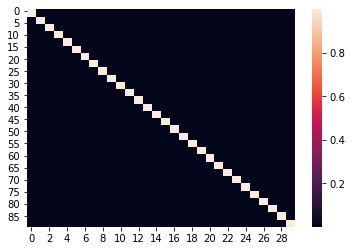

[32] loss: 0.098
tensor([[9.9998e-01, 2.0057e-08, 9.5832e-08,  ..., 1.7144e-07, 2.0753e-06,
         3.0654e-06],
        [9.9998e-01, 5.1269e-07, 1.9319e-07,  ..., 2.3628e-07, 8.2357e-08,
         6.4859e-07],
        [9.9999e-01, 2.0169e-08, 1.2446e-07,  ..., 7.5934e-08, 5.0689e-07,
         7.3323e-07],
        ...,
        [8.1952e-08, 8.7334e-08, 1.4379e-08,  ..., 1.1370e-08, 2.2742e-07,
         1.0000e+00],
        [4.3522e-09, 2.2368e-07, 1.6970e-08,  ..., 5.1323e-08, 3.5064e-08,
         9.9999e-01],
        [5.1966e-08, 1.6119e-08, 1.8069e-08,  ..., 2.1402e-08, 9.2558e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


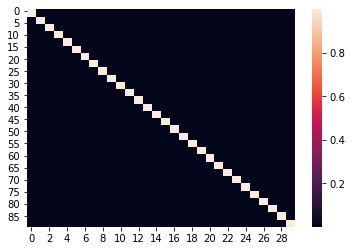

[33] loss: 0.098
tensor([[9.9998e-01, 1.8390e-08, 8.8201e-08,  ..., 1.5846e-07, 1.9421e-06,
         2.8721e-06],
        [9.9998e-01, 4.8101e-07, 1.7991e-07,  ..., 2.2030e-07, 7.6538e-08,
         6.0863e-07],
        [9.9999e-01, 1.8659e-08, 1.1571e-07,  ..., 7.0511e-08, 4.7550e-07,
         6.8783e-07],
        ...,
        [7.5342e-08, 8.0679e-08, 1.3121e-08,  ..., 1.0382e-08, 2.1051e-07,
         1.0000e+00],
        [3.9417e-09, 2.0692e-07, 1.5475e-08,  ..., 4.7076e-08, 3.2120e-08,
         9.9999e-01],
        [4.7751e-08, 1.4761e-08, 1.6518e-08,  ..., 1.9594e-08, 8.5363e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


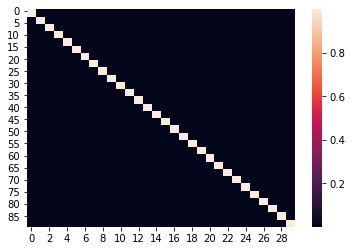

[34] loss: 0.098
tensor([[9.9998e-01, 1.6990e-08, 8.1776e-08,  ..., 1.4749e-07, 1.8280e-06,
         2.7060e-06],
        [9.9998e-01, 4.5382e-07, 1.6860e-07,  ..., 2.0668e-07, 7.1588e-08,
         5.7425e-07],
        [9.9999e-01, 1.7381e-08, 1.0827e-07,  ..., 6.5907e-08, 4.4857e-07,
         6.4880e-07],
        ...,
        [6.9795e-08, 7.5065e-08, 1.2072e-08,  ..., 9.5581e-09, 1.9621e-07,
         1.0000e+00],
        [3.6020e-09, 1.9276e-07, 1.4229e-08,  ..., 4.3519e-08, 2.9654e-08,
         9.9999e-01],
        [4.4215e-08, 1.3625e-08, 1.5223e-08,  ..., 1.8083e-08, 7.9300e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


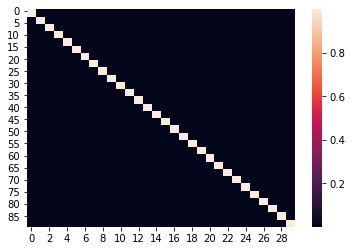

[35] loss: 0.098
tensor([[9.9998e-01, 1.5807e-08, 7.6328e-08,  ..., 1.3816e-07, 1.7296e-06,
         2.5626e-06],
        [9.9998e-01, 4.3035e-07, 1.5892e-07,  ..., 1.9500e-07, 6.7352e-08,
         5.4454e-07],
        [9.9999e-01, 1.6292e-08, 1.0190e-07,  ..., 6.1974e-08, 4.2533e-07,
         6.1507e-07],
        ...,
        [6.5106e-08, 7.0298e-08, 1.1192e-08,  ..., 8.8658e-09, 1.8404e-07,
         1.0000e+00],
        [3.3184e-09, 1.8071e-07, 1.3183e-08,  ..., 4.0516e-08, 2.7574e-08,
         9.9999e-01],
        [4.1228e-08, 1.2667e-08, 1.4134e-08,  ..., 1.6810e-08, 7.4158e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


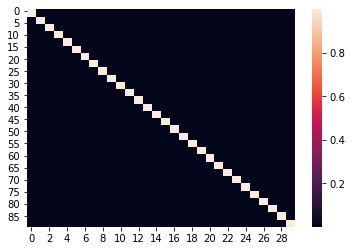

[36] loss: 0.098
tensor([[9.9998e-01, 1.4800e-08, 7.1680e-08,  ..., 1.3017e-07, 1.6445e-06,
         2.4382e-06],
        [9.9998e-01, 4.0999e-07, 1.5057e-07,  ..., 1.8493e-07, 6.3706e-08,
         5.1872e-07],
        [9.9999e-01, 1.5359e-08, 9.6434e-08,  ..., 5.8595e-08, 4.0518e-07,
         5.8579e-07],
        ...,
        [6.1119e-08, 6.6224e-08, 1.0447e-08,  ..., 8.2799e-09, 1.7363e-07,
         1.0000e+00],
        [3.0798e-09, 1.7040e-07, 1.2299e-08,  ..., 3.7966e-08, 2.5808e-08,
         1.0000e+00],
        [3.8688e-08, 1.1854e-08, 1.3211e-08,  ..., 1.5730e-08, 6.9769e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


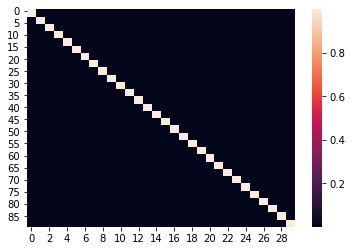

[37] loss: 0.098
tensor([[9.9998e-01, 1.3938e-08, 6.7691e-08,  ..., 1.2329e-07, 1.5705e-06,
         2.3298e-06],
        [9.9998e-01, 3.9226e-07, 1.4335e-07,  ..., 1.7620e-07, 6.0552e-08,
         4.9619e-07],
        [9.9999e-01, 1.4554e-08, 9.1706e-08,  ..., 5.5678e-08, 3.8762e-07,
         5.6025e-07],
        ...,
        [5.7708e-08, 6.2725e-08, 9.8128e-09,  ..., 7.7809e-09, 1.6467e-07,
         1.0000e+00],
        [2.8778e-09, 1.6154e-07, 1.1546e-08,  ..., 3.5786e-08, 2.4300e-08,
         1.0000e+00],
        [3.6515e-08, 1.1160e-08, 1.2424e-08,  ..., 1.4808e-08, 6.6001e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


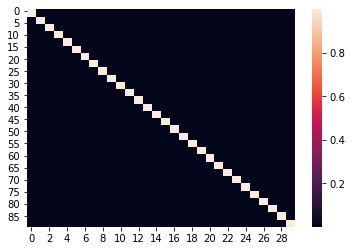

[38] loss: 0.098
tensor([[9.9999e-01, 1.3195e-08, 6.4250e-08,  ..., 1.1733e-07, 1.5058e-06,
         2.2348e-06],
        [9.9998e-01, 3.7676e-07, 1.3707e-07,  ..., 1.6861e-07, 5.7811e-08,
         4.7645e-07],
        [9.9999e-01, 1.3858e-08, 8.7601e-08,  ..., 5.3147e-08, 3.7228e-07,
         5.3787e-07],
        ...,
        [5.4774e-08, 5.9704e-08, 9.2699e-09,  ..., 7.3535e-09, 1.5692e-07,
         1.0000e+00],
        [2.7057e-09, 1.5387e-07, 1.0901e-08,  ..., 3.3914e-08, 2.3004e-08,
         1.0000e+00],
        [3.4647e-08, 1.0564e-08, 1.1750e-08,  ..., 1.4017e-08, 6.2751e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


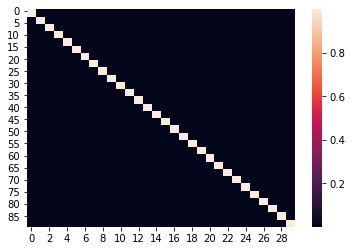

[39] loss: 0.098
tensor([[9.9999e-01, 1.2553e-08, 6.1267e-08,  ..., 1.1216e-07, 1.4491e-06,
         2.1513e-06],
        [9.9999e-01, 3.6314e-07, 1.3159e-07,  ..., 1.6197e-07, 5.5419e-08,
         4.5909e-07],
        [9.9999e-01, 1.3252e-08, 8.4022e-08,  ..., 5.0942e-08, 3.5880e-07,
         5.1820e-07],
        ...,
        [5.2239e-08, 5.7083e-08, 8.8027e-09,  ..., 6.9856e-09, 1.5019e-07,
         1.0000e+00],
        [2.5582e-09, 1.4722e-07, 1.0346e-08,  ..., 3.2296e-08, 2.1885e-08,
         1.0000e+00],
        [3.3033e-08, 1.0049e-08, 1.1168e-08,  ..., 1.3335e-08, 5.9934e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


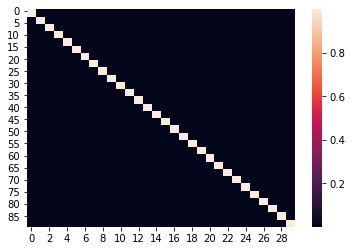

[40] loss: 0.098
tensor([[9.9999e-01, 1.1994e-08, 5.8670e-08,  ..., 1.0764e-07, 1.3992e-06,
         2.0777e-06],
        [9.9999e-01, 3.5115e-07, 1.2678e-07,  ..., 1.5615e-07, 5.3323e-08,
         4.4376e-07],
        [9.9999e-01, 1.2723e-08, 8.0890e-08,  ..., 4.9013e-08, 3.4694e-07,
         5.0085e-07],
        ...,
        [5.0039e-08, 5.4802e-08, 8.3987e-09,  ..., 6.6673e-09, 1.4432e-07,
         1.0000e+00],
        [2.4311e-09, 1.4142e-07, 9.8666e-09,  ..., 3.0894e-08, 2.0914e-08,
         1.0000e+00],
        [3.1633e-08, 9.6037e-09, 1.0665e-08,  ..., 1.2744e-08, 5.7482e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


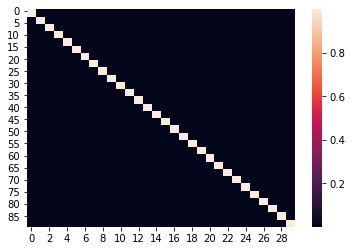

[41] loss: 0.098
tensor([[9.9999e-01, 1.1507e-08, 5.6400e-08,  ..., 1.0369e-07, 1.3552e-06,
         2.0126e-06],
        [9.9999e-01, 3.4056e-07, 1.2256e-07,  ..., 1.5103e-07, 5.1480e-08,
         4.3019e-07],
        [9.9999e-01, 1.2259e-08, 7.8139e-08,  ..., 4.7320e-08, 3.3645e-07,
         4.8549e-07],
        ...,
        [4.8123e-08, 5.2808e-08, 8.0479e-09,  ..., 6.3909e-09, 1.3919e-07,
         1.0000e+00],
        [2.3211e-09, 1.3634e-07, 9.4500e-09,  ..., 2.9673e-08, 2.0069e-08,
         1.0000e+00],
        [3.0413e-08, 9.2157e-09, 1.0228e-08,  ..., 1.2230e-08, 5.5340e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


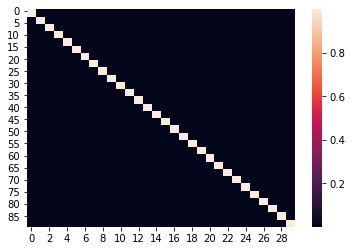

[42] loss: 0.098
tensor([[9.9999e-01, 1.1080e-08, 5.4409e-08,  ..., 1.0021e-07, 1.3162e-06,
         1.9548e-06],
        [9.9999e-01, 3.3117e-07, 1.1883e-07,  ..., 1.4651e-07, 4.9854e-08,
         4.1814e-07],
        [9.9999e-01, 1.1851e-08, 7.5716e-08,  ..., 4.5830e-08, 3.2716e-07,
         4.7185e-07],
        ...,
        [4.6447e-08, 5.1059e-08, 7.7421e-09,  ..., 6.1499e-09, 1.3468e-07,
         1.0000e+00],
        [2.2255e-09, 1.3189e-07, 9.0867e-09,  ..., 2.8605e-08, 1.9330e-08,
         1.0000e+00],
        [2.9347e-08, 8.8767e-09, 9.8467e-09,  ..., 1.1782e-08, 5.3463e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


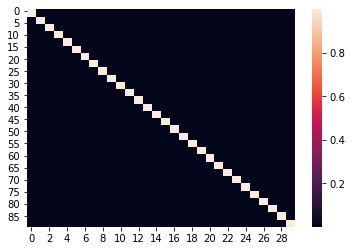

[43] loss: 0.098
tensor([[9.9999e-01, 1.0704e-08, 5.2656e-08,  ..., 9.7145e-08, 1.2815e-06,
         1.9033e-06],
        [9.9999e-01, 3.2282e-07, 1.1554e-07,  ..., 1.4251e-07, 4.8416e-08,
         4.0740e-07],
        [9.9999e-01, 1.1491e-08, 7.3575e-08,  ..., 4.4513e-08, 3.1891e-07,
         4.5971e-07],
        ...,
        [4.4978e-08, 4.9521e-08, 7.4746e-09,  ..., 5.9390e-09, 1.3071e-07,
         1.0000e+00],
        [2.1421e-09, 1.2797e-07, 8.7690e-09,  ..., 2.7670e-08, 1.8682e-08,
         1.0000e+00],
        [2.8412e-08, 8.5795e-09, 9.5127e-09,  ..., 1.1389e-08, 5.1812e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


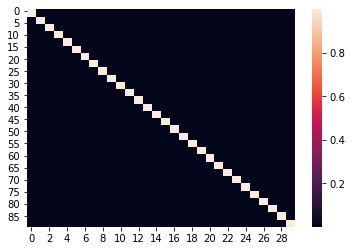

[44] loss: 0.098
tensor([[9.9999e-01, 1.0372e-08, 5.1109e-08,  ..., 9.4434e-08, 1.2507e-06,
         1.8574e-06],
        [9.9999e-01, 3.1539e-07, 1.1261e-07,  ..., 1.3896e-07, 4.7139e-08,
         3.9782e-07],
        [9.9999e-01, 1.1172e-08, 7.1678e-08,  ..., 4.3348e-08, 3.1156e-07,
         4.4888e-07],
        ...,
        [4.3687e-08, 4.8165e-08, 7.2400e-09,  ..., 5.7540e-09, 1.2721e-07,
         1.0000e+00],
        [2.0691e-09, 1.2451e-07, 8.4901e-09,  ..., 2.6847e-08, 1.8112e-08,
         1.0000e+00],
        [2.7590e-08, 8.3183e-09, 9.2195e-09,  ..., 1.1043e-08, 5.0357e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


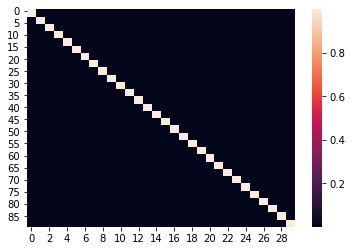

[45] loss: 0.098
tensor([[9.9999e-01, 1.0079e-08, 4.9739e-08,  ..., 9.2030e-08, 1.2232e-06,
         1.8162e-06],
        [9.9999e-01, 3.0876e-07, 1.1001e-07,  ..., 1.3581e-07, 4.6003e-08,
         3.8924e-07],
        [9.9999e-01, 1.0889e-08, 6.9994e-08,  ..., 4.2313e-08, 3.0500e-07,
         4.3919e-07],
        ...,
        [4.2549e-08, 4.6967e-08, 7.0336e-09,  ..., 5.5912e-09, 1.2411e-07,
         1.0000e+00],
        [2.0051e-09, 1.2144e-07, 8.2446e-09,  ..., 2.6121e-08, 1.7609e-08,
         1.0000e+00],
        [2.6865e-08, 8.0880e-09, 8.9614e-09,  ..., 1.0739e-08, 4.9070e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


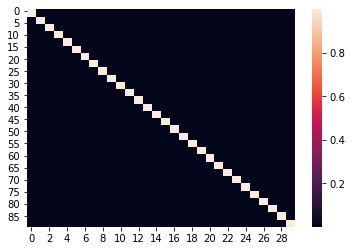

[46] loss: 0.098
tensor([[9.9999e-01, 9.8187e-09, 4.8524e-08,  ..., 8.9893e-08, 1.1986e-06,
         1.7794e-06],
        [9.9999e-01, 3.0282e-07, 1.0770e-07,  ..., 1.3299e-07, 4.4990e-08,
         3.8154e-07],
        [9.9999e-01, 1.0638e-08, 6.8495e-08,  ..., 4.1393e-08, 2.9914e-07,
         4.3049e-07],
        ...,
        [4.1543e-08, 4.5905e-08, 6.8515e-09,  ..., 5.4476e-09, 1.2136e-07,
         1.0000e+00],
        [1.9487e-09, 1.1873e-07, 8.0280e-09,  ..., 2.5480e-08, 1.7164e-08,
         1.0000e+00],
        [2.6225e-08, 7.8845e-09, 8.7335e-09,  ..., 1.0471e-08, 4.7930e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


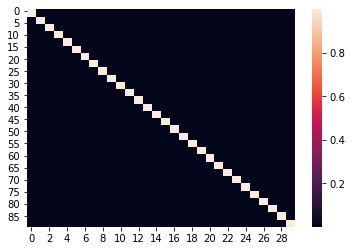

[47] loss: 0.098
tensor([[9.9999e-01, 9.5871e-09, 4.7442e-08,  ..., 8.7991e-08, 1.1765e-06,
         1.7462e-06],
        [9.9999e-01, 2.9751e-07, 1.0563e-07,  ..., 1.3048e-07, 4.4085e-08,
         3.7461e-07],
        [9.9999e-01, 1.0413e-08, 6.7159e-08,  ..., 4.0573e-08, 2.9388e-07,
         4.2268e-07],
        ...,
        [4.0653e-08, 4.4963e-08, 6.6907e-09,  ..., 5.3207e-09, 1.1892e-07,
         1.0000e+00],
        [1.8989e-09, 1.1631e-07, 7.8365e-09,  ..., 2.4913e-08, 1.6770e-08,
         1.0000e+00],
        [2.5659e-08, 7.7042e-09, 8.5321e-09,  ..., 1.0233e-08, 4.6919e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


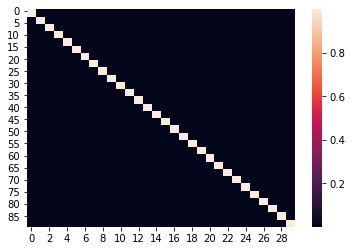

[48] loss: 0.098
tensor([[9.9999e-01, 9.3808e-09, 4.6479e-08,  ..., 8.6293e-08, 1.1567e-06,
         1.7164e-06],
        [9.9999e-01, 2.9273e-07, 1.0378e-07,  ..., 1.2823e-07, 4.3274e-08,
         3.6837e-07],
        [9.9999e-01, 1.0213e-08, 6.5965e-08,  ..., 3.9840e-08, 2.8916e-07,
         4.1564e-07],
        ...,
        [3.9865e-08, 4.4125e-08, 6.5482e-09,  ..., 5.2083e-09, 1.1675e-07,
         1.0000e+00],
        [1.8549e-09, 1.1417e-07, 7.6668e-09,  ..., 2.4409e-08, 1.6419e-08,
         1.0000e+00],
        [2.5157e-08, 7.5443e-09, 8.3535e-09,  ..., 1.0023e-08, 4.6019e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


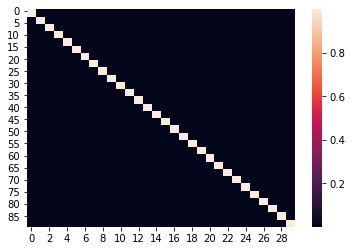

[49] loss: 0.098
tensor([[9.9999e-01, 9.1963e-09, 4.5618e-08,  ..., 8.4774e-08, 1.1389e-06,
         1.6894e-06],
        [9.9999e-01, 2.8843e-07, 1.0212e-07,  ..., 1.2621e-07, 4.2547e-08,
         3.6274e-07],
        [9.9999e-01, 1.0034e-08, 6.4897e-08,  ..., 3.9185e-08, 2.8491e-07,
         4.0929e-07],
        ...,
        [3.9165e-08, 4.3380e-08, 6.4219e-09,  ..., 5.1086e-09, 1.1481e-07,
         1.0000e+00],
        [1.8158e-09, 1.1225e-07, 7.5161e-09,  ..., 2.3962e-08, 1.6108e-08,
         1.0000e+00],
        [2.4711e-08, 7.4021e-09, 8.1951e-09,  ..., 9.8358e-09, 4.5218e-08,
         1.0000e+00]], grad_fn=<SoftmaxBackward0>)


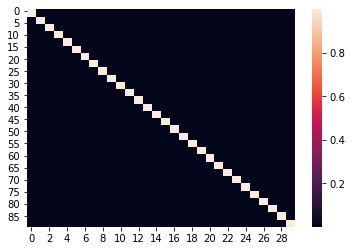

[50] loss: 0.098
Finished Training


In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
for epoch in range(50):  # loop over the dataset multiple times
    

    
    running_loss = 0.0
    # get the inputs
    inputs, labels = trainset_few_shot #data
    

    # zero the parameter gradients
    optimizer.zero_grad()
        
    outputs = m(inputs)
    print(outputs)
    sns.heatmap(outputs.detach())
    plt.show()
    #print(len(labels))
    #print(len(outputs))
    

        
    loss = criterion(outputs, labels)
    
    running_loss += loss.item()
    print('[%d] loss: %.3f' %
        (epoch + 1, running_loss / 25))
        
    loss.backward()
    optimizer.step()

    # print statistics
    
#     print('[%d] loss: %.3f' %
#         (epoch + 1, running_loss / 25))
        
    if epoch % 20 == 0:
        pass
        #scheduler.step()

print('Finished Training')

In [11]:
import numpy as np
a=[[126, 232, 120, 360, 187, 174, 503, 101, 117, 490, 430, 307, 271, 311, 400, 116, 41, 389, 406, 412, 195, 21, 209, 200, 483, 96, 184, 236, 170, 400, 99, 439, 16, 217, 321, 52, 303, 359, 204, 390, 132, 253, 218, 242, 447, 72, 20, 134, 293, 371, 205, 471, 62, 444, 146, 354, 450, 109, 425, 430, 122, 448, 66, 295, 185, 151, 194, 449, 3, 469, 136, 33, 311, 87, 80, 49, 345, 153, 412, 307, 391, 299, 82, 157, 280, 308, 473, 167, 233, 154, 349, 388, 470, 124, 86, 65, 321, 25, 78, 359, 70, 18, 347, 379, 458, 140, 388, 492, 462, 398, 441, 491, 316, 167, 122, 365, 339, 145, 202, 236, 482, 232, 217, 417, 430, 299, 87, 239, 418, 56, 212, 301, 73, 117, 42, 376, 278, 140, 108, 447, 263, 493, 236, 22, 478, 320, 394, 93, 110, 175, 343, 182, 443, 4, 392, 23, 319, 201, 504, 183, 404, 40, 173, 256, 206, 424, 261, 499, 503, 10, 168, 167, 135, 11, 113, 212, 396, 235, 170, 35, 386, 400, 307, 399, 453, 313, 452, 152, 290, 492, 68, 240, 265, 503, 185, 381, 44, 354, 109, 11, 122, 188, 167, 286, 430, 461, 10, 210, 510, 456, 248, 15, 45, 454, 396, 53, 368, 431, 413, 243, 490, 48, 477, 15, 19, 344, 49, 144, 60, 231, 363, 495, 250, 150, 168, 37, 117, 174, 136, 485, 63, 437, 455, 256, 117, 292, 302, 87, 133, 243, 31, 499, 222, 378, 234, 300, 395, 27, 284, 433, 468, 282, 481, 261, 122, 45, 436, 265, 150, 502, 171, 77, 454, 236, 372, 364, 285, 70, 422, 407, 167, 79, 336, 452, 498, 190, 330, 411, 492, 347, 16, 35, 165, 52, 8, 455, 169, 438, 207, 486, 461, 385, 81, 240, 372, 140, 371, 298, 381, 174, 155, 94, 409, 279, 31, 497, 90, 463, 495, 224, 429, 333, 189, 146, 51, 300, 375, 458, 118, 374, 270, 353, 6, 434, 326, 448, 24, 305, 301, 269, 148, 69, 393, 264, 154, 418, 275, 107, 238, 485, 347, 81, 18, 296, 467, 271, 91, 123, 41, 9], [130, 283, 134, 126, 306, 201, 404, 358, 401, 320, 415, 364, 419, 45, 87, 192, 296, 74, 301, 294, 462, 94, 466, 108, 418, 237, 385, 507, 272, 447, 144, 210, 376, 197, 487, 352, 188, 219, 187, 104, 228, 407, 316, 3, 443, 30, 46, 262, 201, 227, 423, 114, 261, 29, 287, 412, 80, 195, 102, 263, 371, 277, 322, 96, 97, 62, 54, 205, 223, 232, 484, 100, 379, 409, 162, 11, 115, 72, 274, 50, 243, 401, 146, 183, 135, 383, 122, 191, 460, 84, 370, 144, 173, 94, 306, 430, 86, 289, 205, 267, 359, 408, 273, 256, 509, 82, 56, 333, 409, 258, 314, 467, 13, 469, 94, 488, 478, 68, 225, 454, 389, 167, 453, 312, 404, 327, 139, 429, 333, 336, 145, 231, 311, 38, 5, 181, 208, 374, 385, 401, 267, 504, 419, 498, 88, 254, 335, 472, 142, 497, 120, 15, 2, 3, 114, 416, 328, 360, 159, 495, 91, 413, 241, 187, 337, 237, 334, 440, 168, 93, 258, 88, 490, 205, 282, 21, 146, 200, 275, 368, 491, 261, 228, 183, 190, 263, 236, 226, 204, 321, 386, 371, 130, 43, 490, 498, 511, 149, 286, 375, 78, 242, 293, 328, 397, 204, 227, 237, 334, 216, 304, 422, 212, 275, 339, 35, 50, 274, 116, 46, 163, 337, 16, 147, 117, 412, 178, 455, 52, 467, 218, 398, 370, 358, 55, 446, 137, 509, 209, 489, 147, 434, 307, 314, 472, 12, 217, 171, 161, 481, 485, 195, 81, 19, 77, 109, 212, 305, 437, 182, 409, 211, 369, 278, 510, 235, 452, 80, 212, 328, 296, 332, 207, 141, 484, 128, 425, 419, 239, 44, 397, 264, 227, 130, 157, 330, 142, 63, 318, 84, 511, 246, 498, 104, 160, 201, 30, 333, 69, 412, 190, 228, 483, 61, 324, 292, 359, 440, 145, 334, 74, 296, 388, 226, 28, 130, 183, 472, 25, 321, 297, 401, 417, 461, 16, 136, 404, 315, 267, 474, 142, 59, 119, 139, 56, 181, 408, 317, 420, 227, 153, 231, 72, 38, 274, 356, 389, 375, 420, 309, 214, 184, 210, 167, 476, 487, 353, 115, 47, 64, 158, 84, 391, 442, 41, 220, 418, 70, 386, 333, 422, 404, 98, 293, 325, 318, 454, 110, 119, 124, 342, 320, 314, 494, 406, 370, 435, 357, 200, 52, 123, 465, 510, 22, 101, 24, 110, 462, 152, 478, 182, 446, 150, 95, 75, 450, 116, 192, 379, 305, 444, 362, 26, 109, 206, 292, 160, 18, 29, 175, 202, 465, 73, 2, 429, 367, 112, 226, 463, 153, 325, 93, 420, 297, 498, 460, 499, 101, 53, 32, 496, 318, 437, 266, 146, 343, 48, 96, 121, 183, 164, 353, 150, 451, 17, 21, 413, 188, 339, 64, 75, 376, 484, 461, 300, 217, 414, 441, 447, 223, 21, 425, 184, 309, 416, 272, 499, 4, 460, 299, 14, 15, 343, 507, 143, 52, 409, 65, 94, 434, 187, 168, 448, 292, 199, 344, 352, 275, 60, 88, 79, 495, 178, 449, 67, 173, 186, 177, 458, 455, 399, 0, 251, 126, 384, 102, 172, 308, 84, 477, 375, 366, 383, 270, 411, 360, 319, 220, 293, 302, 257, 39, 238, 108, 294, 341, 76, 459, 426, 204, 474, 418, 215, 378, 237, 185, 464, 148, 283, 486, 509, 466, 503, 344, 258, 281, 210, 229, 75, 477, 441, 42, 256, 159, 400, 242, 188, 300, 236, 320], [154, 140, 169, 485, 344, 79, 130, 164, 182, 308, 14, 68, 283, 248, 288, 253, 409, 267, 134, 412, 501, 451, 432, 166, 109, 360, 465, 417, 115, 490, 393, 307, 390, 428, 218, 306, 374, 138, 395, 347, 243, 439, 335, 496, 37, 102, 207, 1, 97, 402, 192, 232, 464, 188, 171, 39, 463, 88, 397, 19, 336, 230, 376, 426, 220, 359, 143, 351, 455, 404, 47, 139, 116, 218, 348, 42, 180, 229, 234, 495, 264, 238, 103, 186, 211, 189, 481, 204, 105, 315, 421, 216, 76, 122, 223, 330, 414, 299, 297, 60, 73, 200, 196, 453, 441, 490, 191, 86, 231, 243, 279, 32, 353, 153, 256, 266, 499, 245, 369, 148, 461, 71, 244, 446, 157, 478, 486, 483, 159, 453, 496, 272, 372, 287, 365, 163, 117, 308, 113, 193, 467, 66, 165, 402, 375, 83, 89, 436, 235, 376, 482, 361, 43, 118, 495, 25, 463, 360, 296, 411, 141, 472, 508, 181, 257, 267, 475, 69, 130, 254, 166, 292, 358, 427, 433, 279, 50, 210, 389, 211, 300, 387, 442, 439, 192, 250, 392, 457, 106, 115, 424, 242, 395, 425, 138, 108, 360, 178, 24, 405, 23, 349, 366, 83, 260, 202, 459, 132, 109, 334, 412, 177, 417, 304, 13, 130, 372, 311, 134, 55, 343, 415, 115, 444, 222, 234, 227, 14, 338, 75, 59, 206, 68, 64, 97, 286, 414, 149, 411, 243, 220, 244, 76, 501, 463, 147, 511, 19, 427, 128, 460, 326, 41, 464, 31, 154, 301, 394, 89, 150, 214, 78, 201, 468, 486, 229, 161, 242, 116, 239, 33, 225, 455, 148, 180, 228, 204, 354, 64, 21, 462, 359, 151, 147, 38, 52, 371, 436, 334, 342, 444, 223, 95, 35, 213, 405, 135, 126, 327, 318, 66, 230, 419, 212, 73, 441, 70, 9, 309, 199, 314, 291, 347, 251, 236, 282, 262, 174, 47, 107, 500, 443, 251, 408, 137, 269, 73, 335, 281, 315, 213, 155, 486, 150, 93, 157, 375, 300, 423, 306, 186, 509, 128, 24, 172, 201, 511, 301, 206, 19, 485, 322, 289, 363, 250, 89, 299, 410, 327, 71, 314, 371, 366, 62, 311, 409, 368, 481, 68, 252, 189, 276, 419, 317, 198, 318, 153, 101, 414, 187, 36, 308, 28, 383, 369, 232, 122, 390, 191, 95, 386, 358, 90, 428, 388, 250, 103, 426, 125, 4, 29, 221, 5, 414, 422, 12, 441, 313, 322, 229, 22, 439, 275, 296, 97, 391, 272, 131, 217, 455, 488, 81, 311, 283, 9, 460, 190, 187, 192, 331, 277, 87, 174, 279, 16, 464, 382, 255, 266, 425, 67, 231, 445, 75, 491, 468, 298, 430, 359, 421, 394, 152, 209, 491, 78, 371, 189, 49, 414, 204, 147, 180, 446, 117, 91, 90, 256, 428, 31, 504, 116, 142, 126, 229, 218, 480, 88, 462, 181, 86, 242, 314, 75, 510, 114, 9, 472, 343, 193, 159, 441, 246, 332, 443, 119, 350, 415, 483, 15, 121, 351, 401, 278, 16, 266, 404, 334, 240, 179, 320, 47, 450, 167, 300, 501, 309, 504, 266, 384, 208, 39, 104, 87, 403, 121, 215, 240, 400, 444, 193, 480, 332, 200, 107, 495, 441, 202, 185, 181, 52, 144, 325, 456, 67, 221, 367, 88, 312, 493, 415, 372, 401, 490, 214, 378, 398, 197, 186, 149, 375, 187, 357, 127, 411, 371, 53, 241, 227, 463, 85, 245, 310, 25, 19, 453, 393, 172, 482, 252, 472, 97, 304, 385, 128, 289, 76, 96, 20, 68, 188, 306, 168, 426, 23, 269, 140, 177, 431, 368, 141, 195, 62, 256, 381, 310, 112, 380, 345, 498, 11, 268, 145, 228, 493, 307, 408, 344, 447, 38, 373, 200, 319, 60, 274, 56, 467, 0, 58, 471, 480, 37, 393, 264, 213, 347, 155, 253, 115, 425, 361, 268, 438, 185, 330, 16, 264, 203, 164, 49, 171, 419, 509, 218, 276, 327, 334, 282, 358, 237, 312, 428, 489, 414, 38, 281, 205, 4, 116, 497, 299, 167, 172, 339, 411, 175, 152, 337, 247, 114, 446, 87, 156, 332, 124, 86, 230, 166, 210, 476, 7, 169, 283, 369, 415, 163, 15, 477, 386, 109, 24, 443, 285, 72, 179, 236, 221, 6, 28, 210, 60, 405, 353, 443, 189, 170, 35, 40, 273, 510, 352, 248, 377, 393, 478, 398, 304, 239, 137, 355, 107, 477, 144, 150, 315, 9, 142, 448, 384, 31, 77, 215, 306, 52, 296, 219, 14, 112, 73, 228, 439, 309, 321, 263, 325, 275, 186, 416, 458, 456, 336, 417, 441, 27, 347, 469, 383, 399, 90, 86, 446, 419, 45, 325, 421, 161, 509, 264, 143, 91, 80, 414, 267, 129, 359, 371, 181, 281, 218, 66, 116, 351, 478, 433, 369, 159, 493, 285, 497, 185, 451, 480, 503, 394, 134, 72, 49, 25, 466, 120, 292, 189, 19, 455, 315, 214, 82, 327, 403, 204, 16, 128, 180, 235, 1, 370, 266, 310, 472, 402, 453, 484, 426, 449, 376, 467, 418, 216, 258, 305, 158, 111, 265, 2, 432, 162, 164, 387, 224, 241, 21, 96, 212, 397, 254, 127, 338, 192, 381, 498, 51, 7, 289, 415, 226, 424, 64, 110, 118, 262, 345, 155, 184, 362, 160, 344, 74, 213, 316, 183, 440, 420, 314, 211, 506, 112, 430, 298, 240, 318, 436, 39, 11, 99, 200, 66, 380, 378, 132, 410, 36, 0, 281, 291, 379, 479, 295, 195, 319, 438, 129, 149, 163, 44, 100, 251, 57, 113, 216, 349, 492, 182, 154, 54, 491, 27, 277, 321, 63, 324, 293, 229, 193, 351, 413, 141, 287, 120, 93, 69, 5, 13, 460, 239, 7, 77, 85, 488, 450, 83, 396, 76, 133, 389, 357, 273, 35, 394, 199, 28, 434]]
print([len(i) for i in a],
    [len(np.unique(i)) for i in a], 
    [np.max(i) for i in a], sep="\n")

[360, 570, 960]
[273, 352, 454]
[510, 511, 511]


In [12]:
testset = torchvision.datasets.CIFAR100(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1,
                                          shuffle=False, num_workers=6)

_class = [i for i in range(5)]
shot_number = 10

testset_few_shot = get_few_shot_learing_data(_class,shot_number,testloader)

Files already downloaded and verified


C:\Users\barto\AppData\Local\Temp/ipykernel_13580/3293775616.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_data.append(torch.tensor(_data[i][j]).clone().detach().unsqueeze(0))
C:\Users\barto\AppData\Local\Temp/ipykernel_13580/3293775616.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_label.append(torch.tensor(_data_label[i][j]).clone().detach())


tensor([[1.0682e-02, 1.0874e-02, 6.9711e-03,  ..., 7.6291e-04, 2.1879e-02,
         4.1631e-01],
        [1.2371e-02, 2.1486e-02, 2.1487e-02,  ..., 2.7277e-03, 4.8128e-02,
         2.2787e-01],
        [1.8019e-02, 3.2423e-03, 1.7031e-03,  ..., 7.8196e-04, 8.5183e-03,
         7.2672e-01],
        ...,
        [3.7358e-03, 8.8384e-02, 4.6238e-03,  ..., 2.5032e-02, 9.2474e-03,
         2.3484e-02],
        [5.9595e-04, 3.7842e-02, 1.6543e-03,  ..., 4.7008e-02, 2.4648e-03,
         2.9662e-02],
        [1.4384e-03, 1.9520e-02, 2.8431e-03,  ..., 2.1963e-02, 7.4203e-03,
         1.3618e-02]], grad_fn=<SoftmaxBackward0>)


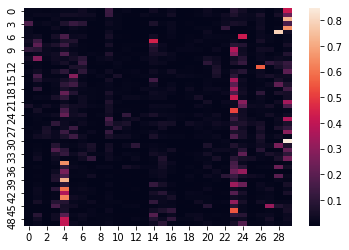

In [13]:
inputs, labels = testset_few_shot
outputs = m(inputs)
print(outputs)
sns.heatmap(outputs.detach())
plt.show()

In [14]:
y = torch.argmax(outputs, dim=1)

In [15]:
y

tensor([29, 29, 29,  0, 29, 28, 24, 14,  1, 23, 23,  1,  6, 26, 29,  5, 23, 28,
        23,  4, 23, 29, 24, 23,  4, 29,  9, 23, 29, 23, 29, 28, 29, 24, 29,  4,
        28, 24, 28,  4, 23,  4,  4,  4, 23, 27, 23,  4,  4,  4])

In [16]:
sum(labels==y)

tensor(8)

In [17]:
y2=torch.randint(0,5,(50,))

In [18]:
sum(labels==y2)

tensor(11)

### PCAM

In [19]:
trainsetPCAM = torchvision.datasets.PCAM(root='./data',split = 'train',download=True, transform=transform)
trainloaderPCAM = torch.utils.data.DataLoader(trainset, batch_size=1,
                                          shuffle=False, num_workers=2)

_class = [0,1]

In [ ]:
valsetPCAM = torchvision.datasets.PCAM(root='./data',split = 'val',download=True, transform=transform)
valloaderPCAM = torch.utils.data.DataLoader(valset, batch_size=1,
                                          shuffle=False, num_workers=2)

_class = [0,1]

In [21]:
testsetPCAM = torchvision.datasets.PCAM(root='./data',split = 'test',download=True, transform=transform)
testloaderPCAM = torch.utils.data.DataLoader(testset, batch_size=1,
                                          shuffle=False, num_workers=2)

_class = [0,1]

In [22]:
def get_few_shot_learing_data_PCAM(_class,shot_number,trainloader):
    dataiter = trainloader
    _data = [ [] for i in range(len(_class))]
    _data_label = [ [] for i in range(len(_class))]

    for ind,data in enumerate(dataiter):
        image, label = dataiter[ind]
        print(label)
        if label in _class:
            if len(_data[label])!=shot_number:
                _data[label].append(image)
                _data_label[label].append(label)

        if sum([len(tab) for tab in _data]) ==   shot_number * len(_class):
             break
    print(_data_label)
    out_data= []
    out_label= [] 

    out_data_tensor = torch.Tensor(len(_class)*shot_number,3, 224, 224)
    out_label_tensor= torch.Tensor(len(_class)*shot_number)

    for i in range(len(_class)):
        for j in range(shot_number):
            out_data.append(torch.tensor(_data[i][j]).clone().detach().unsqueeze(0))        
            out_label.append(torch.tensor([_data_label[i][j]]).clone().detach()) 
    print(out_data)
    print(out_label)
    torch.cat(out_data , out=out_data_tensor)    
    torch.cat(out_label , out=out_label_tensor)    
    out_data_tensor=out_data_tensor.squeeze()
    out_label_tensor = out_label_tensor.type(torch.long)
    trainset_few_shot = out_data_tensor.squeeze(),out_label_tensor.squeeze()
    return trainset_few_shot



In [ ]:
_class = [0,1]
shot_number = 5

trainset_few_shot = get_few_shot_learing_data_PCAM(_class,shot_number,trainsetPCAM)

C:\Users\barto\AppData\Local\Temp/ipykernel_13580/3293775616.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_data.append(torch.tensor(_data[i][j]).clone().detach().unsqueeze(0))
C:\Users\barto\AppData\Local\Temp/ipykernel_13580/3293775616.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_label.append(torch.tensor(_data_label[i][j]).clone().detach())


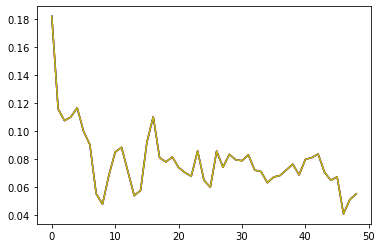

wybrane warstwy:  [0, 4, 1]


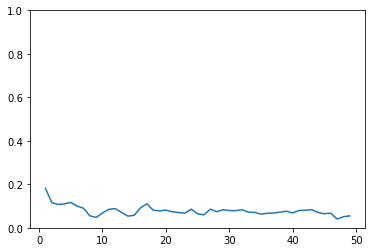

[0, 1, 4]
[[18, 47, 59, 4, 62, 5, 39, 28, 27, 13, 60, 48, 20, 56, 16, 21, 30, 52, 42, 23, 54, 34, 51, 8, 33, 15, 3, 55, 10, 36, 46, 22, 32, 9, 24, 1, 25, 26, 37, 63, 19, 41, 31, 0, 35, 58, 40, 17, 57, 11], [1, 61, 59, 17, 28, 7, 39, 47, 27, 2, 10, 24, 0, 38, 22, 14, 36, 58, 56, 12, 41, 42, 30, 11, 15, 6, 20, 43, 51, 13, 31, 32, 35, 37, 26, 50, 3, 16, 54, 34, 29, 52, 23, 19, 18, 8, 57, 21, 40, 55, 60, 46, 25, 63, 33, 4, 48], [22, 9, 24, 26, 6, 18, 13, 34, 4, 39, 52, 5, 1, 51, 54, 60, 8, 27, 36, 55, 20, 50, 15, 42, 48, 10, 33, 62, 53, 58, 45, 21, 35, 2, 37, 17, 56, 61, 59, 19, 23, 43, 11, 49, 3, 31, 41, 16, 25, 12, 40, 0, 57, 29, 47, 63, 30, 28, 32, 46, 44]]
997248
wybrane mapy:  [[18, 47, 59, 4, 62, 5, 39, 28, 27, 13, 60, 48, 20, 56, 16, 21, 30, 52, 42, 23, 54, 34, 51, 8, 33, 15, 3, 55, 10, 36, 46, 22, 32, 9, 24, 1, 25, 26, 37, 63, 19, 41, 31, 0, 35, 58, 40, 17, 57, 11], [1, 61, 59, 17, 28, 7, 39, 47, 27, 2, 10, 24, 0, 38, 22, 14, 36, 58, 56, 12, 41, 42, 30, 11, 15, 6, 20, 43, 51, 13, 3

C:\Users\barto\AppData\Local\Temp/ipykernel_13580/3293775616.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_data.append(torch.tensor(_data[i][j]).clone().detach().unsqueeze(0))
C:\Users\barto\AppData\Local\Temp/ipykernel_13580/3293775616.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out_label.append(torch.tensor(_data_label[i][j]).clone().detach())


accuracy_score


0.6

In [26]:
_class = [0,1]
shot_number = 50

#train
trainset_few_shot_pcamp = get_few_shot_learing_data(_class,shot_number,trainloaderPCAM)
m_pcam = ATL(trainset_few_shot_pcamp,3)


# trenowanie 
#
#
#
#
#


#test
testset_few_shot_pcamp = get_few_shot_learing_data(_class,shot_number,testloaderPCAM)
inputs, labels = testset_few_shot_pcamp
outputs = m_pcam(inputs)
#print(outputs)
y = torch.argmax(outputs, dim=1)

print("accuracy_score")
accuracy_score(y,labels)
